Script: to concat files and assign top EF
--
Function seperates background exons, NVEs, and non-NVE alt splicing

In [4]:
import pandas as pd
import os
import seaborn as sns

import glob
import subprocess

import concurrent.futures
import multiprocessing as mp

import numpy as np

import os
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
import scipy
sns.set_context('poster')
import matplotlib.pyplot as plt
#from SplicingStats.MaxEnt import MaxEnt
#import pybedtools
hsv_pal=sns.color_palette('hsv', as_cmap=False)
#from pyensembl import EnsemblRelease
import numpy as np


sns.set_context('poster') 
plt.rcParams["font.sans-serif"] = 'Arial'

plt.rcParams["font.variant"]='normal'

plt.rcParams["font.size"]='15'
hsv_pal=sns.color_palette('hsv', as_cmap=False)
EF_palette = ['#699C63', '#86AE7F', '#A6C39F', '#CBD8BE', '#AAC4D0', '#8EB7BF', '#71A4AF']



import data
--

In [1]:
#dir_w_all_exons='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/results_post_reviews/'



#data_directory='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/'



#top_EF_df=pd.read_csv(data_directory+'01_data/new_results/NVEs_with_annot_info_assigned_frames_based_on_cognate_assigned_to_NMD_categories.csv.gz', low_memory=False,compression='gzip')


#gtex_tissues=list(set(top_EF_df.tissue))

#output_dir = "/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/results_post_reviews/"



















import EFs from google cloud
--

In [7]:
dir_w_all_exons='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/results_post_reviews/'

#cut off values

directory_path = dir_w_all_exons+'EFs_assigned/'
all_EF_df=pd.DataFrame()
files=os.listdir(directory_path)
for f in files:
    if '.csv' in f:
        tissue=f.split('_alt')[0]
        print(f)
        given_df=pd.read_csv(directory_path+f, compression='gzip', low_memory=False)
        given_df=given_df.assign(tissue=tissue)
        all_EF_df=pd.concat([all_EF_df, given_df])
        

Skin_Sun_Exposed_Lower_leg_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Lung_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Brain_Spinal_cord_cervical_c-1_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Uterus_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Adipose_Subcutaneous_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Pituitary_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Nerve_Tibial_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Testis_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Thyroid_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Colon_Sigmoid_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Breast_Mammary_Tissue_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Artery_Aorta_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Cells_EBV-transformed_lymphocytes_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Brain_Hippocampus_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Brain_Hypothalamus_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Stomach_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Brain_Anterior_cingulate_cortex_BA24_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz
Esophagus_Gastroesophageal

In [8]:
all_EF_df.splicing_event=all_EF_df.intron_1.isna().replace({True:'skipped_exon',False:'alt_splice_site'})

In [197]:
all_EF_df[all_EF_df.tissue=='Adipose_Subcutaneous'].to_csv('Adipose_Subcutaneous_alt_ss_and_SEs_EF_5_FPR_5_values.csv.gz',
                                                          compression='gzip')

merge with old skipped exons
--

In [ ]:
#directory_path='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/output_of_EF_pipeline/EF_outputs/'



directory_path='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/results_post_reviews/cluster_names_SEs/'



skipped_exons_df=pd.DataFrame()
files=os.listdir(directory_path)
for f in files:
    if '.csv' in f:
        tissue=f.split('cluster')[0]
        if '_aa_' not in f:
            given_df=pd.read_csv(directory_path+f, low_memory=False)
            given_df=given_df.assign(tissue=tissue)
            skipped_exons_df=pd.concat([skipped_exons_df, given_df])



#filter file
filter_dir='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/00_data/emp_bayes_input/'
filter_file='skipped_exons_w_gene_names_and_assigned_abc_introns.csv.gz'

skipped_exons_info=pd.read_csv(filter_dir+filter_file, compression='gzip')

#counts_dir = '/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/GTEx sQTLs/GTEx_Analysis_v8_sQTL_leafcutter_counts/'


all_EF_df_SEs_w_cluster_names=pd.DataFrame()
for tissue in list(set(skipped_exons_df.tissue)):
    results=all_EF_df_SEs[all_EF_df_SEs.tissue==tissue]
    results=results[results.tissue=='Whole_Blood'].drop_duplicates(subset=['params_triple', 'params','total_reads_spanning_all_junctions'])

    names=skipped_exons_df[skipped_exons_df.tissue==tissue]
    one_tissue=pd.concat([names.drop(columns={'number_people_in_sample', 'tissue','Unnamed: 0'}),  results], axis=1)
    all_EF_df_SEs_w_cluster_names=pd.concat([one_tissue,  all_EF_df_SEs_w_cluster_names])

step 1 filter  and save exons
--

In [9]:
def filter_and_save_exons(all_EFs_df, type_ss):
    #check for convergence
    all_EFs_df = all_EFs_df[all_EFs_df['function_output_emp_bayes'].apply(lambda x: x.split('success: ')[1].split('\n')[0])=='True']

    #filter background
    all_EFs_background_df = all_EFs_df[all_EFs_df.EF_5<0.01]
    
    all_EFs_above_5_percent_PSI = all_EFs_df[all_EFs_df.EF_5>0.01]
    
    EF_5_bin = pd.cut(all_EFs_above_5_percent_PSI.EF_5, [0,0.1,0.3,0.5,0.7,0.9,1.0])
    
    all_EFs_above_5_percent_PSI=all_EFs_above_5_percent_PSI.assign(EF_5_bin=EF_5_bin)

    if type_ss=='alt_ss':
        intron_1=all_EFs_above_5_percent_PSI.intron_1.apply(lambda x: x.split(':clu')[0])

        intron_2=all_EFs_above_5_percent_PSI.intron_2.apply(lambda x: x.split(':clu')[0])
        
        cluster_name_no_ID=intron_1+'_'+intron_2
        
        all_EFs_above_5_percent_PSI=all_EFs_above_5_percent_PSI.assign(cluster_name_no_ID=cluster_name_no_ID)
        all_EFs_above_5_percent_PSI=all_EFs_above_5_percent_PSI.assign(splicing_event='alt_splice_site')
        
        

    elif type_ss=='se':

            

  
        exclusion=all_EFs_above_5_percent_PSI[all_EFs_above_5_percent_PSI.minority_is_exclusion_event]

        exclusion=exclusion.assign(intron_1_unskipped=exclusion.cluster_name.apply(lambda x:  x.split('_chr')[0]))
    ########
        exclusion=exclusion.assign(intron_2_unskipped=exclusion.cluster_name.apply(lambda x: 'chr'+x.split('_chr')[2]+':'+x.split(':')[3].split('_chr')[0]))
                                                                                                                                  
    
        exclusion=exclusion.assign(intron_skipped=exclusion.cluster_name.apply(lambda x: 'chr'+x.split('_chr')[1]))
    
        
        # For 'exclusion' DataFrame
        intron_1_exclusion = exclusion.cluster_name.apply(lambda x: x.split('_chr')[0])
        exclusion = exclusion.assign(intron_1=intron_1_exclusion)
        
        intron_2_exclusion = exclusion.cluster_name.apply(lambda x: 'chr'+x.split('_chr')[1])


        exclusion = exclusion.assign(intron_2=intron_2_exclusion)
        
        # For 'inclusion' DataFrame
        inclusion=all_EFs_above_5_percent_PSI[~all_EFs_above_5_percent_PSI.minority_is_exclusion_event]
        #switch
        inclusion=inclusion.assign(intron_skipped=inclusion.cluster_name.apply(lambda x:  x.split('_chr')[0]))
    ########
        inclusion=inclusion.assign(intron_2_unskipped=inclusion.cluster_name.apply(lambda x: 'chr'+x.split('_chr')[2]+':'+x.split(':')[3].split('_chr')[0]))
                                                                                                                                  
        inclusion=inclusion.assign(intron_1_unskipped=inclusion.cluster_name.apply(lambda x: 'chr'+x.split('_chr')[1]))
    
        
        intron_1_inclusion = inclusion.intron_1_unskipped
        inclusion = inclusion.assign(intron_1=intron_1_inclusion)


        
        intron_2_inclusion = inclusion.intron_skipped
        inclusion = inclusion.assign(intron_2=intron_2_inclusion)
        
        # Combining 'inclusion' and 'exclusion' DataFrames
        all_EFs_above_5_percent_PSI = pd.concat([inclusion, exclusion])
        
                
        #all_EFs_above_5_percent_PSI=pd.concat([inclusion, exclusion])

        cluster_name_no_ID=all_EFs_above_5_percent_PSI.intron_1_unskipped.apply(lambda x: x.split(':clu')[0]) +'_'+all_EFs_above_5_percent_PSI.intron_skipped.apply(lambda x: x.split(':clu')[0])+'_'+all_EFs_above_5_percent_PSI.intron_2_unskipped.apply(lambda x: x.split(':clu')[0])
        print(cluster_name_no_ID.iloc[0])
        all_EFs_above_5_percent_PSI=all_EFs_above_5_percent_PSI.assign(cluster_name_no_ID=cluster_name_no_ID)
       

        all_EFs_above_5_percent_PSI=all_EFs_above_5_percent_PSI.assign(splicing_event='skipped_exon')
         
   # top_EF_all_tissues = all_EFs_above_5_percent_PSI.sort_values(by='EF_5', ascending=False).drop_duplicates(subset='cluster_name', keep='first')

    #max_EF = 1 - (1/all_EFs_above_5_percent_PSI.number_people_in_sample)
    
    #all_EFs_above_5_percent_PSI_below_100=all_EFs_above_5_percent_PSI[max_EF<=all_EFs_above_5_percent_PSI.EF_5]

    #all_alt_splicing_non_NVE_EFs=all_EFs_above_5_percent_PSI[max_EF>all_EFs_above_5_percent_PSI.EF_5]

    #all_EFs_above_5_percent_PSI.to_csv('/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/01_data/new_results/all_EF_all_tissues_'+type_ss+'.csv.gz', 
                              #compression = 'gzip',
                              #index=True)
    
    #all_EFs_background.to_csv('/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/01_data/new_results/all_EF_background_set_'+type_ss+'.csv.gz', 
                             # compression = 'gzip',
                             # index=True)
    
    #top_EF_all_tissues.to_csv('/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/01_data/new_results/top_EF_all_tissues_'+type_ss+'.csv.gz', 
                             # compression = 'gzip',
                            #  index=True)

    return all_EFs_above_5_percent_PSI,  all_EFs_background_df

        
   
        
                            
    
                              

process SE more because it got messed up
--

In [10]:
se_info_dir='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/results_post_reviews/SE_info/'

list_of_tissues=list(set(all_EF_df.tissue))

SE_info_to_merge=pd.DataFrame([])
for tissue in list_of_tissues:
    
    exmaple_tissue_SE_info=pd.read_csv(se_info_dir+tissue+'_SE_extra_info.csv',  low_memory=False)

    SE_info_to_merge=pd.concat([SE_info_to_merge,exmaple_tissue_SE_info])



all_EF_df_SEs_w_cluster_names = all_EF_df[all_EF_df.splicing_event=='skipped_exon']

#all_EF_df_SEs_w_cluster_names=all_EF_df_SEs_w_cluster_names[all_EF_df_SEs_w_cluster_names.params_triple.apply(lambda x: len(x)==138)]

#all_EF_df_SEs_w_cluster_names=all_EF_df_SEs_w_cluster_names[all_EF_df_SEs_w_cluster_names.cluster_name_new.apply(lambda x: type(x))!=float]



In [78]:
#all_EF_df_SEs_w_cluster_names

In [11]:
all_EF_df_SEs_w_cluster_names=all_EF_df_SEs_w_cluster_names.merge(SE_info_to_merge,left_on=['cluster_name', 'tissue'], right_on=['cluster_name', 'tissue'])

In [12]:
#all_EF_df_SEs_w_cluster_names=all_EF_df_SEs_w_cluster_names.assign(cluster_name=all_EF_df_SEs_w_cluster_names.cluster_name_new)

In [13]:
percent_inclusion=all_EF_df_SEs_w_cluster_names.minority_is_exclusion_event.value_counts()/len(all_EF_df_SEs_w_cluster_names)*100

<Axes: xlabel='minority_is_exclusion_event', ylabel='count'>

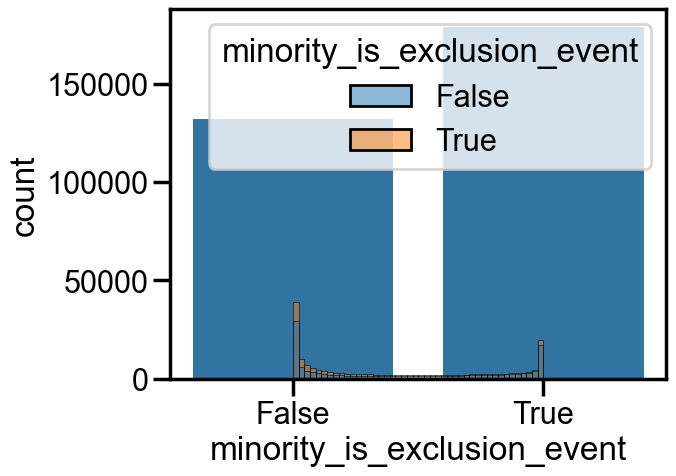

In [14]:
sns.countplot(data=all_EF_df_SEs_w_cluster_names,
             x='minority_is_exclusion_event')

sns.histplot(data=all_EF_df_SEs_w_cluster_names,
             x='EF_5', hue='minority_is_exclusion_event')

968159

In [88]:
#all_EFs_above_5_percent_PSI_se

In [16]:
[all_EFs_above_5_percent_PSI_se, all_EFs_background_df_se]= filter_and_save_exons(all_EF_df_SEs_w_cluster_names, 'se')




chr4:5139960:5168299_chr4:5139960:5140197_chr4:5140306:5168299


In [294]:
len(all_EFs_above_5_percent_PSI_se)+712189

968159

In [19]:
Spectral=sns.color_palette('Spectral')

In [20]:
def plot_based_on_filter_step(df, title):
    fig, axes = plt.subplots(2, 1, figsize=(10,10))
    axes[0].set_title(title)
    sns.histplot(data=df,
                 x='EF_5', hue='minority_is_exclusion_event', ax=axes[0], palette=[Spectral[0],Spectral[-1]], bins=10)
    
    plt.bar(x=['exclusion', 'inclusion'], height=df.minority_is_exclusion_event.value_counts()/len(df)*100,
           color=[Spectral[0],Spectral[-1]])
    
    plt.ylim([0,100])
    plt.tight_layout()
    plt.ylabel('percent of set')
    sns.despine()

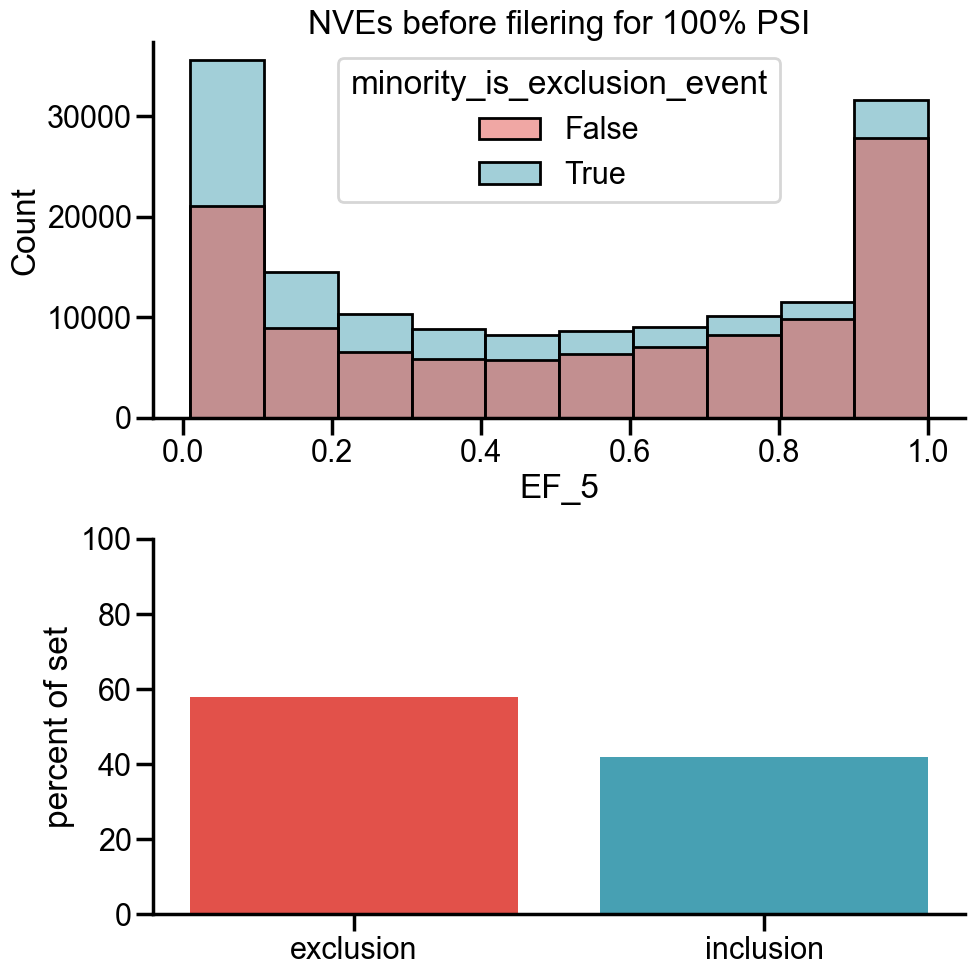

In [21]:
plot_based_on_filter_step(all_EFs_above_5_percent_PSI_se,'NVEs before filering for 100% PSI' )

In [106]:
#inclusion_low_EF=all_EFs_background_df_se[all_EFs_background_df_se.minority_is_exclusion_event==False]


In [107]:
#len(inclusion_low_EF)

In [108]:
#exclusion_low_EF=all_EFs_background_df_se[all_EFs_background_df_se.minority_is_exclusion_event==True]

In [109]:
#len(exclusion_low_EF)

In [22]:
NVEs=all_EFs_above_5_percent_PSI_se[all_EFs_above_5_percent_PSI_se.EF_5<=0.99]

non_NVEs=all_EFs_above_5_percent_PSI_se[all_EFs_above_5_percent_PSI_se.EF_5>0.99]

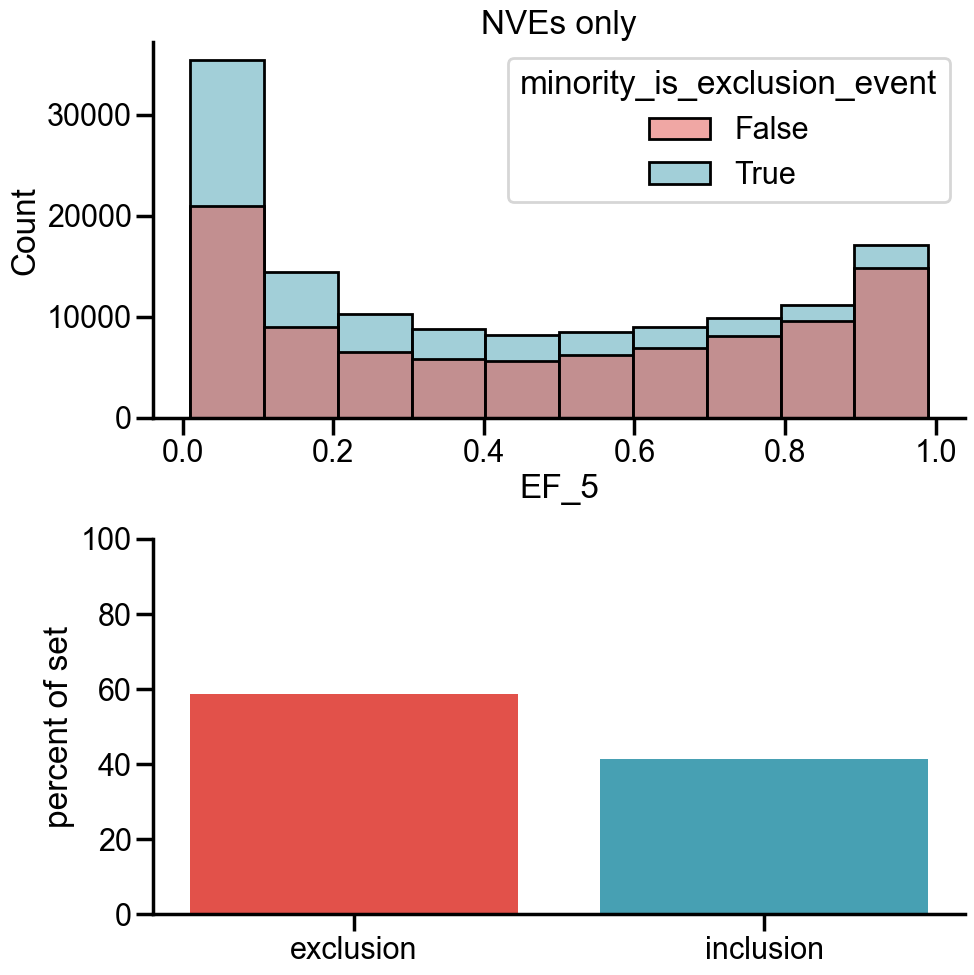

In [23]:
plot_based_on_filter_step(NVEs,'NVEs only' )

In [24]:
#data_directory='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/01_data/new_results/'

In [25]:
#single_model_data_SEs=pd.read_csv(data_directory+'old_NVEs_SE.csv')

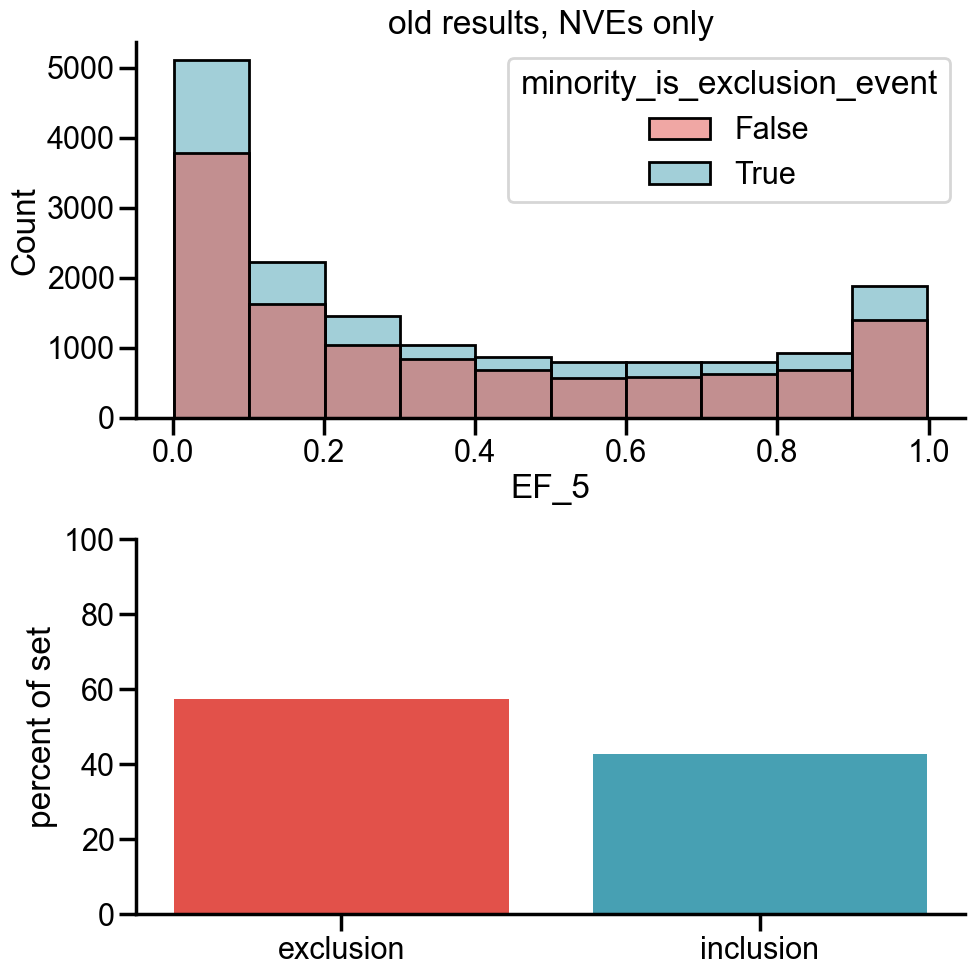

In [114]:
plot_based_on_filter_step(single_model_data_SEs,'old results, NVEs only' )

In [26]:
#NVEs=NVEs.assign(new_EF_5=NVEs.EF_5)
#single_model_data_SEs=single_model_data_SEs.assign(old_EF_5=single_model_data_SEs.EF_5)

In [186]:
#can_merge=NVEs.drop(columns={'intron_2',  'intron_1'}).merge(single_model_data_SEs, on=['cluster_name', 'tissue'])

In [187]:
#sum(can_merge.minority_is_exclusion_event_y)

0

In [188]:
#len(can_merge.minority_is_exclusion_event_y)

0

In [190]:
#sns.scatterplot(data=can_merge[can_merge.minority_is_exclusion_event_x==True],
          #  x='new_EF_5',
          #y='old_EF_5')

In [27]:
all_EF_df_alt_ss = all_EF_df[all_EF_df.splicing_event=='alt_splice_site']

[all_EFs_above_5_percent_PSI_alt_ss, all_EFs_background_df_alt_ss]= filter_and_save_exons(all_EF_df_alt_ss, 'alt_ss')



In [28]:
len(all_EFs_above_5_percent_PSI_alt_ss)

712189

In [29]:
NVEs_alt=all_EFs_above_5_percent_PSI_alt_ss[all_EFs_above_5_percent_PSI_alt_ss.EF_5<=0.99]

non_NVEs_alt=all_EFs_above_5_percent_PSI_alt_ss[all_EFs_above_5_percent_PSI_alt_ss.EF_5>0.99]

/var/folders/20/mx4zvjpx5_n_bftbxj9cyg0r0000gn/T/ipykernel_11209/2095819529.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=NVEs_alt,


<Axes: xlabel='EF_5', ylabel='Count'>

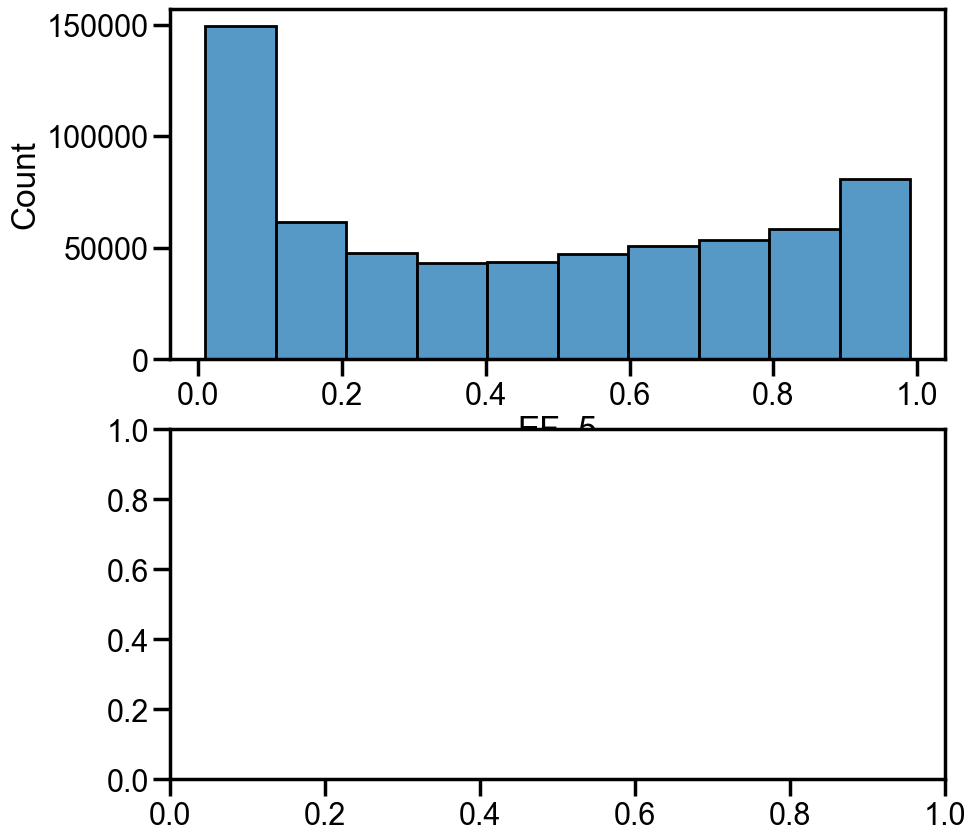

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))

sns.histplot(data=NVEs_alt,
        x='EF_5',  ax=axes[0], palette=[Spectral[0],Spectral[-1]], bins=10)

    
    

In [32]:
all_E_all_tissues_NVEs.intron_1

NameError: name 'all_E_all_tissues_NVEs' is not defined

In [ ]:
len(top_EF_5_across_all_tissues_NVEs)

In [33]:
#data_directory='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/results_post_reviews/data/01_data/'

#all_EF_all_tissues_nonNVEs = all_EF_all_tissues[all_EF_all_tissues.EF_5>0.99]


#all_EF_all_tissues_nonNVEs.splicing_event_detailed.value_counts()

concat files
--

In [36]:
all_EF_all_tissues = pd.concat([all_EFs_above_5_percent_PSI_alt_ss,
                                all_EFs_above_5_percent_PSI_se])


all_EF_all_tissues_NVEs = all_EF_all_tissues[all_EF_all_tissues.EF_5<=0.99]

#all_EF_all_tissues_NVEs.to_csv(data_directory+'all_EF_all_tissues_alt_ss_se.csv.gz', compression='gzip')

top_EF_5_across_all_tissues = all_EF_all_tissues.sort_values(by='EF_5', ascending=False).drop_duplicates(subset='cluster_name_no_ID',
                                                                                             keep='first'  )

#top_EF_5_across_all_tissues_NVEs.to_csv(data_directory+'top_EF_all_tissues_alt_ss_se.csv.gz', compression='gzip')

In [38]:
len(all_EFs_above_5_percent_PSI_alt_ss)

712189

In [39]:
len(all_EFs_above_5_percent_PSI_se)

255970

In [ ]:
#all_EF_all_tissues_NVEs =  pd.read_csv('all_EF_all_tissues_alt_ss_se.csv.gz', compression='gzip')


#all_EF_all_tissues_NVEs_old=all_EF_all_tissues_NVEs

#all_EF_alt_ss_tissues_NVEs =  pd.read_csv('all_EF_all_tissues_alt_ss.csv.gz', compression='gzip')
#
#all_EF_all_tissues_NVEs_old_AS=all_EF_alt_ss_tissues_NVEs

#all_EF_alt_ss_tissues_NVEs.splicing_event.value_counts()

In [40]:
top_EF_5_across_all_tissues_NVEs=top_EF_5_across_all_tissues[top_EF_5_across_all_tissues.EF_5<=0.99]

top_EF_5_across_all_tissues_non_NVEs=top_EF_5_across_all_tissues[top_EF_5_across_all_tissues.EF_5>0.99]

In [45]:
top_EF_5_across_all_tissues_non_NVEs.EF_5.max()

1.0

filter for maxent, size, and protein coding
--

In [46]:
from Bio.Seq import Seq

import numpy as np

import pandas as pd

import seaborn as sns
sns.set_context('poster')
from pyfaidx import Fasta
import matplotlib.pyplot as plt
import SplicingStats
from SplicingStats.MaxEnt import MaxEnt
import pybedtools
hsv_pal=sns.color_palette('hsv', as_cmap=False)
from pyensembl import EnsemblRelease


sns.set_context('poster') 
plt.rcParams["font.family"] = 'arial'

plt.rcParams["font.variant"]='small-caps'

plt.rcParams["font.size"]='30'
hsv_pal=sns.color_palette('hsv', as_cmap=False)

In [193]:
#all_EF_all_tissues = pd.read_csv('all_EF_all_tissues_alt_ss.csv.gz', compression='gzip')


Functions required for filtering alt ss
--

In [47]:
def assign_four_splice_sites(all_EF_df_meets_five_percent_PSI_cutoff):
    all_EF_df_meets_five_percent_PSI_cutoff
    adj=1
    
    ss_a = all_EF_df_meets_five_percent_PSI_cutoff.intron_1.apply(lambda x: int(x.split(':')[1]))
    #add 1
    ss_b = all_EF_df_meets_five_percent_PSI_cutoff.intron_1.apply(lambda x: int(x.split(':')[2])-adj)
    #add 1
    ss_c = all_EF_df_meets_five_percent_PSI_cutoff.intron_2.apply(lambda x: int(x.split(':')[1]))
    ss_d = all_EF_df_meets_five_percent_PSI_cutoff.intron_2.apply(lambda x: int(x.split(':')[2])-adj)

    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_a=ss_a)
    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_b=ss_b)

    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_c=ss_c)
    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_d=ss_d)
    
    return all_EF_df_meets_five_percent_PSI_cutoff

def define_constant_minority_majority_ss(df):
    
    strand=df.strand.iloc[1]
    type_ss=df.splicing_event.iloc[1]
    
    adj=1

    if type_ss=='alt_3_prime':
        
        if strand=='+':

            
            df=df.rename(columns={'ss_d':'majority_ss',
                                           'ss_b': 'minority_ss',
                                           'ss_a': 'constant_ss'
                                          })

            minority_ss_start = df['minority_ss'] - 20  - adj #done

            minority_ss_end = df['minority_ss'] + 3  -adj#done

            majority_ss_start = df['majority_ss'] - 20 -adj#done

            majority_ss_end = df['majority_ss'] +3 -adj #done
                                  

            
        elif strand=='-':
            
            
            df=df.rename(columns={'ss_c':'majority_ss',
                                           'ss_a': 'minority_ss',
                                           'ss_b': 'constant_ss',   
                                          })
            #leafcutter adjustment
       
            minority_ss_start = df['minority_ss'] - 3    #done
            minority_ss_end = df['minority_ss'] + 20  #done

            majority_ss_start = df['majority_ss'] - 3  #done

            majority_ss_end = df['majority_ss'] + 20  #done
                                  
  #######ALT 5 PRIME#########         
    elif type_ss=='alt_5_prime':
        
        if strand=='+':
            
            df=df.rename(columns={'ss_c':'majority_ss',
                                           'ss_a': 'minority_ss',
                                           'ss_b': 'constant_ss'
                                          })

            minority_ss_start = df['minority_ss'] - 3 #done

            minority_ss_end = df['minority_ss'] + 6 #done

            majority_ss_start = df['majority_ss'] - 3 #done

            majority_ss_end = df['majority_ss'] + 6 #done
                                  
      
        elif strand=='-':
            
  
            df=df.rename(columns={'ss_d':'majority_ss',
                                           'ss_b': 'minority_ss',
                                           'ss_a': 'constant_ss',
                             
                                          })
          
            minority_ss_start = df['minority_ss'] - 3 - 4

            minority_ss_end = df['minority_ss'] + 6 - 4

            majority_ss_start = df['majority_ss'] - 3 - 4

            majority_ss_end = df['majority_ss'] + 6 - 4
            
                
        

    df=df.assign(minority_ss_start=minority_ss_start)
    df=df.assign(minority_ss_end=minority_ss_end)
    
    
    df=df.assign(majority_ss_start=majority_ss_start)
    df=df.assign(majority_ss_end=majority_ss_end)
    
    return df
            




            
def get_fasta_for_ss(df, type_ss):
    df=df.assign(chromosome=df.cluster_name.apply(lambda x: x.split(':')[0]))
    for_fasta = df[['chromosome', type_ss+'_start', type_ss+'_end', 'strand']]

    strand=df.strand.iloc[1]

    a = pybedtools.BedTool.from_dataframe(for_fasta)
    
    fasta = pybedtools.example_filename('/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/annotations/fasta_hg38/hg38.fa')
    
    a = a.sequence(fi=fasta, s=True)

    fastas=open(a.seqfn).read()

    seqs=fastas.split('\n')[1::2]
    seqs=[sequence.upper() for sequence in seqs]
    
    

    regions=fastas.split('\n')[0:-1:2]
    fastas = pd.DataFrame({'regions' : regions,
                                'fastas' : seqs})  
    if strand=='-':
        reverse_comp=fastas.fastas.apply(lambda x: ''.join(Seq(x).reverse_complement()))

        fastas = pd.DataFrame({'regions' : regions,
                                'fastas' : reverse_comp})  
    return fastas


def compute_maxent_on_data(df, ss_list_flag):
    compute_maxent=MaxEnt()
    
    if ss_list_flag=='alt_splicing':
        
        ss_list=['constant_ss', 'minority_ss', 'majority_ss']


        
        for ss in ss_list:
            df_w_fastas=get_fasta_for_ss(df, ss)
        
            fasta_ss_seq = df_w_fastas.fastas
            
            if ss=='minority_ss':
                df=df.assign(minor_ss_seq=list(fasta_ss_seq))
            if ss=='majority_ss':
                df=df.assign(major_ss_seq=list(fasta_ss_seq))
            if ss=='constant_ss':
                df=df.assign(constant_ss_seq=list(fasta_ss_seq))
    
        
            maxent_scores = compute_maxent.compute_score(df_w_fastas['fastas'].values)
    
            df[ss+'_maxent_score']=maxent_scores

    elif ss_list_flag=='skipped_exon':

        ss_list=['majority_ss_1', 'majority_ss_2', 'minority_ss_1', 'minority_ss_2']

        
            
        for ss in ss_list:
        

            df_w_fastas=get_fasta_for_ss(df, ss)

            fasta_ss_seq = df_w_fastas.fastas

            if ss=='majority_ss_1':
                df=df.assign(majority_ss_1_seq=list(fasta_ss_seq))
            if ss=='majority_ss_2':
                df=df.assign(majority_ss_2_seq=list(fasta_ss_seq))
            if ss=='minority_ss_1':
                df=df.assign(minority_ss_1_seq=list(fasta_ss_seq))
            if ss=='minority_ss_2':
                df=df.assign(minority_ss_2_seq=list(fasta_ss_seq))
                
            maxent_scores = compute_maxent.compute_score(df_w_fastas['fastas'].values)

            df[ss+'_maxent_score']=maxent_scores
        

        

    
    return df


def try_all_ss_alt_ss(df):
    ####### positive strand
        
        df=df.assign(strand='+')
        
    # as 3' splice site
        as_3_pos=df.assign(splicing_event='alt_3_prime')
    
        
        as_3_pos=define_constant_minority_majority_ss(as_3_pos)

        
        as_three_prime_pos=compute_maxent_on_data(as_3_pos, 'alt_splicing')

    # as 5' splice site
        as_five_pos=df.assign(splicing_event='alt_5_prime')

        
        as_five_pos=define_constant_minority_majority_ss(as_five_pos)

  
        
        as_five_prime_pos=compute_maxent_on_data(as_five_pos, 'alt_splicing')
        
######### negative strand #########
        df=df.assign(strand='-')

# as 3' splice site
        as_3_neg=df.assign(splicing_event='alt_3_prime')
    
        
        as_3_neg=define_constant_minority_majority_ss(as_3_neg) 

    
        as_three_prime_neg=compute_maxent_on_data(as_3_neg, 'alt_splicing')
        
    
 # as 5' splice site
        as_5_neg=df.assign(splicing_event='alt_5_prime')
        

        as_5_neg=define_constant_minority_majority_ss(as_5_neg)

        
        as_five_prime_neg=compute_maxent_on_data(as_5_neg, 'alt_splicing')


        return as_five_prime_pos , as_three_prime_pos, as_five_prime_neg , as_three_prime_neg

def passed_threshold(df, type):
    if type=='alt_ss':
        
        passed_bool=((df.minority_ss_maxent_score>0) * (df.majority_ss_maxent_score>0) * (df.constant_ss_maxent_score>0))
        greater_than_zero=(df.majority_ss - df.minority_ss).abs() > 0 
    elif type=='SE':
            passed_bool=(df[['majority_ss_1_maxent_score', 'majority_ss_2_maxent_score', 'minority_ss_1_maxent_score',	'minority_ss_2_maxent_score']]>0).sum(axis=1)==4

            greater_than_zero = True
    return passed_bool * greater_than_zero

def assign_four_splice_sites(all_EF_df_meets_five_percent_PSI_cutoff):
    adj=1
    
    ss_a = all_EF_df_meets_five_percent_PSI_cutoff.intron_1.apply(lambda x: int(x.split(':')[1]))
    #add 1
    ss_b = all_EF_df_meets_five_percent_PSI_cutoff.intron_1.apply(lambda x: int(x.split(':')[2])-adj)
    #add 1
    ss_c = all_EF_df_meets_five_percent_PSI_cutoff.intron_2.apply(lambda x: int(x.split(':')[1]))
    
    ss_d = all_EF_df_meets_five_percent_PSI_cutoff.intron_2.apply(lambda x: int(x.split(':')[2])-adj)

    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_a=ss_a)
    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_b=ss_b)

    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_c=ss_c)
    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_d=ss_d)
    
    return all_EF_df_meets_five_percent_PSI_cutoff

    
def define_constant_minority_majority_ss(df):
    
    strand=df.strand.iloc[1]
    type_ss=df.splicing_event.iloc[1]
    
 

    if type_ss=='alt_3_prime':
        
        if strand=='+':
            
            df=df.rename(columns={'ss_d':'majority_ss',
                                           'ss_b': 'minority_ss',
                                           'ss_a': 'constant_ss'
                                          })

            minority_ss_start = df['minority_ss'] - 20  #done

            minority_ss_end = df['minority_ss'] + 3  #done

            majority_ss_start = df['majority_ss'] - 20#done

            majority_ss_end = df['majority_ss'] +3  #done
                                  
            constant_ss_start = df['constant_ss'] - 3

            constant_ss_end = df['constant_ss'] + 6  
                                  
            
        elif strand=='-':
            
            
            df=df.rename(columns={'ss_a':'minority_ss',
                                           'ss_c': 'majority_ss',
                                           'ss_b': 'constant_ss',   
                                          })
            #leafcutter adjustment
       
            minority_ss_start = df['minority_ss'] - 3    #done
            minority_ss_end = df['minority_ss'] + 20  #done

            majority_ss_start = df['majority_ss'] - 3  #done

            majority_ss_end = df['majority_ss'] + 20  #done

            constant_ss_start = df['constant_ss'] - 6

            constant_ss_end = df['constant_ss'] + 3  
                                  
  #######ALT 5 PRIME#########         
    elif type_ss=='alt_5_prime':
        
        if strand=='+':
            
            df=df.rename(columns={'ss_c':'majority_ss',
                                           'ss_a': 'minority_ss',
                                           'ss_b': 'constant_ss'
                                          })

            minority_ss_start = df['minority_ss'] - 3 #done

            minority_ss_end = df['minority_ss'] + 6 #done

            majority_ss_start = df['majority_ss'] - 3 #done

            majority_ss_end = df['majority_ss'] + 6 #done
                                  
            constant_ss_start = df['constant_ss'] - 20

            constant_ss_end = df['constant_ss'] + 3  

        
        elif strand=='-':
            
  
            df=df.rename(columns={'ss_d':'majority_ss',
                                           'ss_b': 'minority_ss',
                                           'ss_a': 'constant_ss',
                             
                                          })

            minority_ss_start = df['minority_ss'] - 6 

            minority_ss_end = df['minority_ss'] + 3 

            majority_ss_start = df['majority_ss'] - 6 
            majority_ss_end = df['majority_ss'] + 3 

            constant_ss_start = df['constant_ss'] - 3

            constant_ss_end = df['constant_ss'] + 20 
                
        

    df=df.assign(minority_ss_start=minority_ss_start)
    df=df.assign(minority_ss_end=minority_ss_end)
    
    
    df=df.assign(majority_ss_start=majority_ss_start)
    df=df.assign(majority_ss_end=majority_ss_end)

    df=df.assign(constant_ss_start=constant_ss_start)
    df=df.assign(constant_ss_end=constant_ss_end)
    
    return df
            


sns.set_context('poster')
def plot_scores(df):
    plt.subplots_adjust(wspace=0.4, hspace=0)
    f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, sharex=True, 
                                     figsize=(30/1.5,6/1.5))

    if df.splicing_event.iloc[0]=='alt_5_prime':
        constant_ss='alt_3_prime'
    else:
        constant_ss='alt_5_prime'
    
    ax=sns.histplot(df.constant_ss_maxent_score, ax=ax1, color='black')
    ax.set_title('constant is '+ str(df.strand.iloc[1]+ ' '+constant_ss))
    
        
    ax1=sns.histplot(df.majority_ss_maxent_score, ax=ax2, color='black')
    ax1.set_title('cognate is '+str(df.strand.iloc[1])+ ' ' + str(df.splicing_event.iloc[1]))
        
    ax2=sns.histplot(df.minority_ss_maxent_score, ax=ax3, color='black')
    
    ax2.set_title('NVE is '+str(df.strand.iloc[1])+ ' ' + str(df.splicing_event.iloc[1]))        
    ax.set_xlabel('maxent score')
    ax1.set_xlabel('maxent score')
    ax3.set_xlabel('maxent score')
    ax2.set_xlabel('maxent score')
    sns.despine()

In [48]:

top_EF_5_across_all_tissues_alt_ss=assign_four_splice_sites(top_EF_5_across_all_tissues[top_EF_5_across_all_tissues.splicing_event=='alt_splice_site'])



In [49]:
len(top_EF_5_across_all_tissues_alt_ss)

178864

run maxent
--

In [50]:
[as_five_prime_pos , as_three_prime_pos, as_five_prime_neg , as_three_prime_neg]= try_all_ss_alt_ss(top_EF_5_across_all_tissues_alt_ss)

;

n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n
n


''

<Figure size 640x480 with 0 Axes>

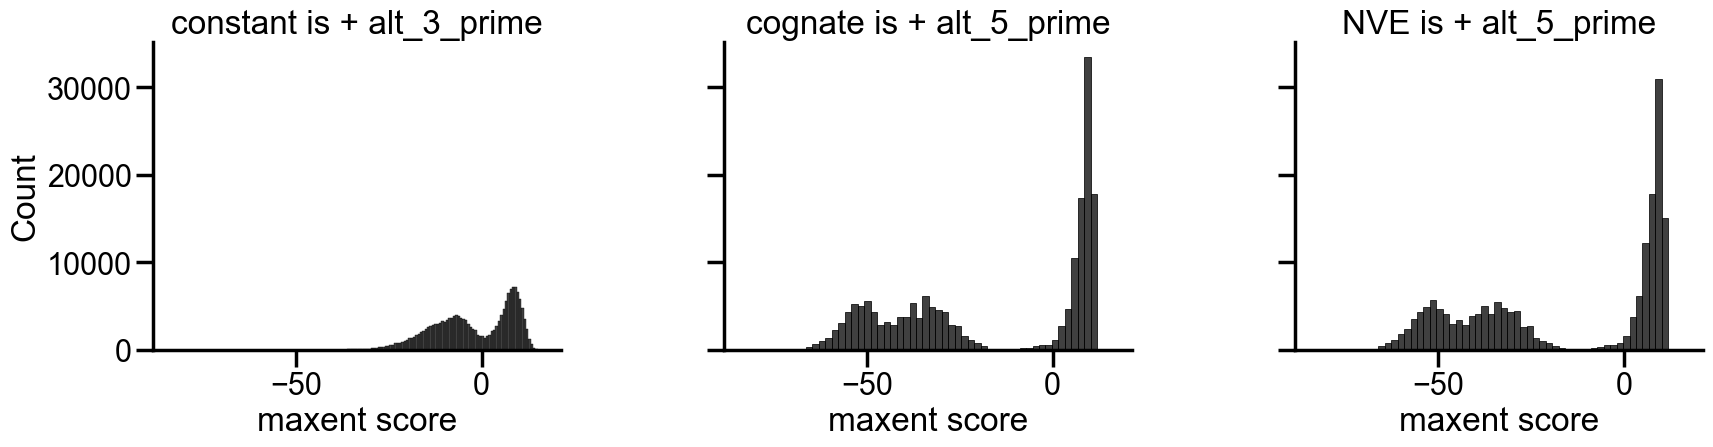

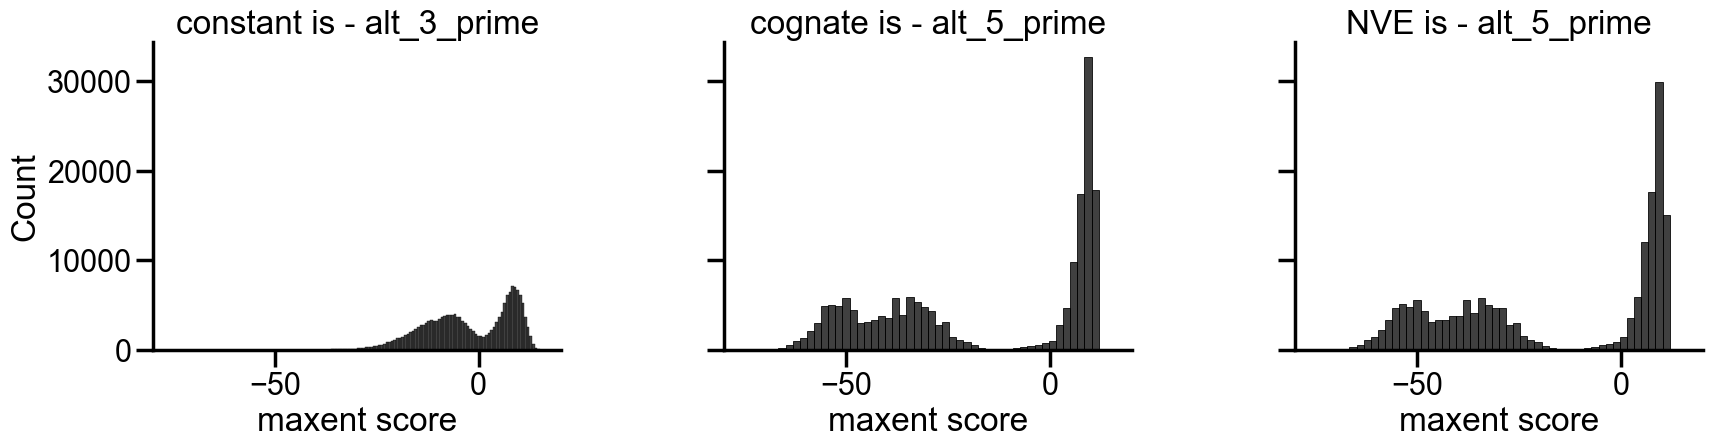

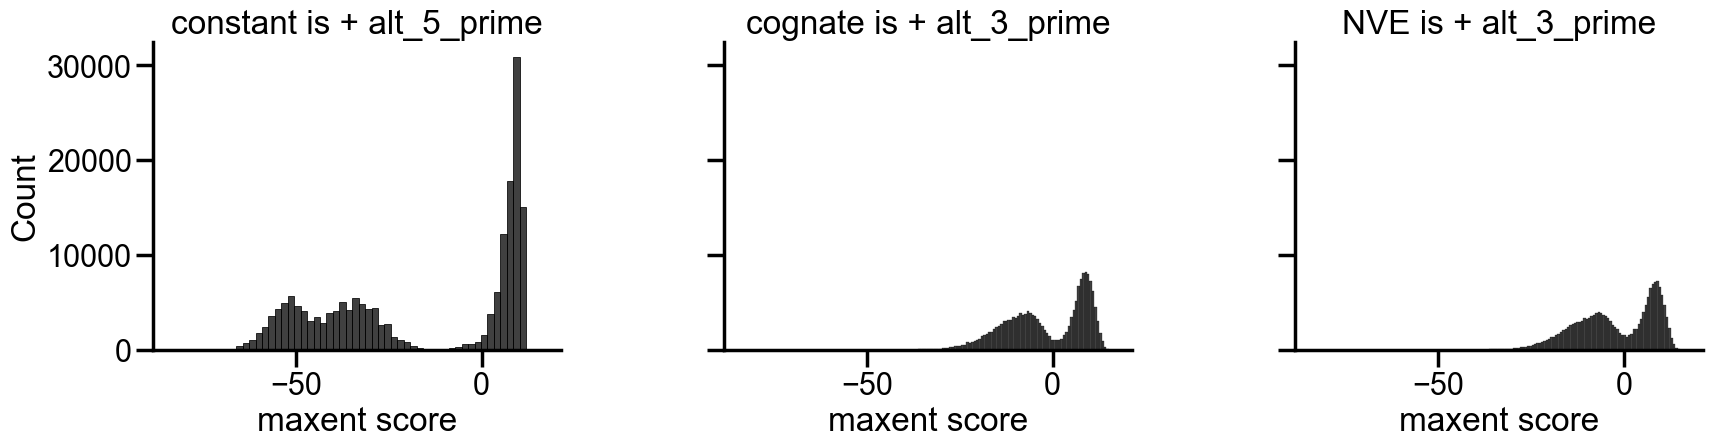

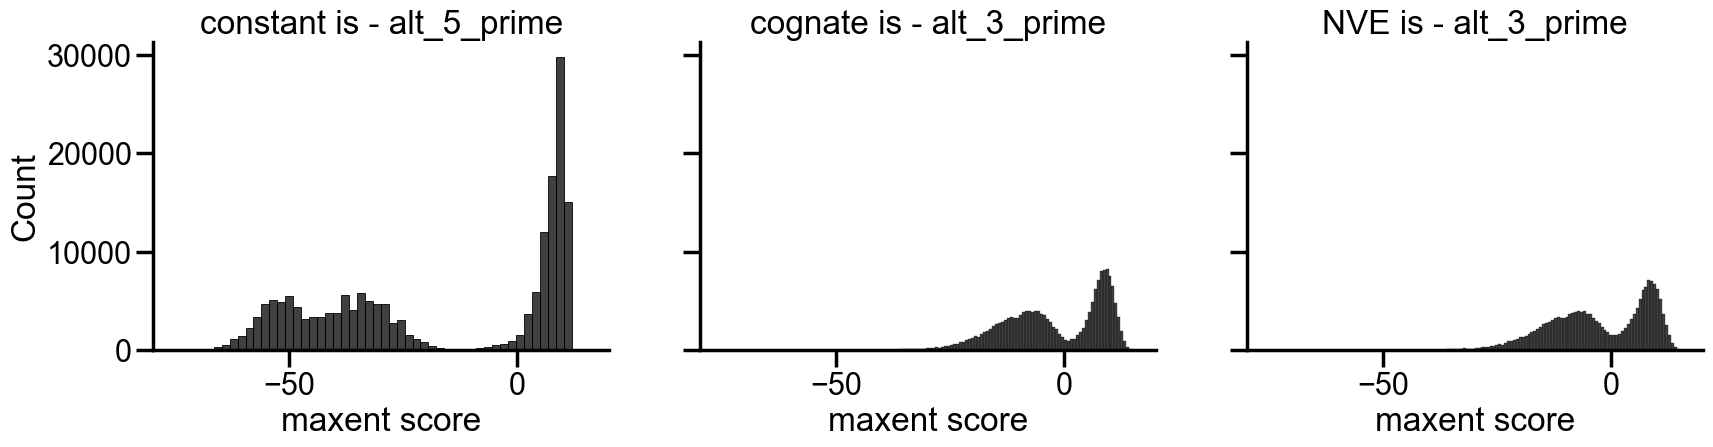

In [51]:
plot_scores(as_five_prime_pos)
plot_scores(as_five_prime_neg)
plot_scores(as_three_prime_pos)
plot_scores(as_three_prime_neg)

# alternative ss
assign splice site based on maxent score
--

In [52]:
as_five_prime_pos_passed=as_five_prime_pos[passed_threshold(as_five_prime_pos,'alt_ss') ]# ((as_five_prime_pos.constant_ss_maxent_score) > (as_three_prime_pos.constant_ss_maxent_score))]

as_three_prime_pos_passed=as_three_prime_pos[passed_threshold(as_three_prime_pos,'alt_ss') ]# & ((as_five_prime_pos.constant_ss_maxent_score) < (as_three_prime_pos.constant_ss_maxent_score))]

as_five_prime_neg_passed=as_five_prime_neg[passed_threshold(as_five_prime_neg, 'alt_ss') ]#& ((as_five_prime_neg.constant_ss_maxent_score) > (as_three_prime_neg.constant_ss_maxent_score))]

as_three_prime_neg_passed=as_three_prime_neg[passed_threshold(as_three_prime_neg,'alt_ss') ]#& ((as_five_prime_neg.constant_ss_maxent_score) < (as_three_prime_neg.constant_ss_maxent_score))]
 



assigned_a_splice_site = len(as_five_prime_pos_passed)+len(as_three_prime_pos_passed)+len(as_five_prime_neg_passed)+len(as_three_prime_neg_passed)

#percent that scored at least 0
assigned_a_splice_site/len(top_EF_5_across_all_tissues)


0.7150122198980315

assign exon lengths 3p and 5p
--

In [56]:

exon_length_n = (as_five_prime_neg_passed.minority_ss - as_five_prime_neg_passed.majority_ss) 

exon_length_p = (as_five_prime_pos_passed.majority_ss - as_five_prime_pos_passed.minority_ss) 

as_five_prime_pos_passed=as_five_prime_pos_passed.assign(exon_length=exon_length_p)

as_five_prime_neg_passed=as_five_prime_neg_passed.assign(exon_length=exon_length_n)

exon_length=pd.concat([exon_length_p, exon_length_n])





In [57]:
exon_length_n = (as_three_prime_neg_passed.minority_ss - as_three_prime_neg_passed.majority_ss) 

exon_length_p = (as_three_prime_pos_passed.majority_ss - as_three_prime_pos_passed.minority_ss) 


as_three_prime_pos_passed=as_three_prime_pos_passed.assign(exon_length=exon_length_p)

as_three_prime_neg_passed=as_three_prime_neg_passed.assign(exon_length=exon_length_n)




top_events_assigned_by_maxent = pd.concat([as_five_prime_pos_passed, as_three_prime_pos_passed, as_five_prime_neg_passed, as_three_prime_neg_passed])


In [2]:
#top_events_assigned_by_maxent

Assign gene names with strand info and filter for protein coding
--

In [59]:
top_events_assigned_by_maxent_under_500bp=top_events_assigned_by_maxent[top_events_assigned_by_maxent.exon_length.abs()<=500]

top_events_assigned_by_maxent_under_500bp=top_events_assigned_by_maxent_under_500bp.assign(chromosome=top_events_assigned_by_maxent_under_500bp.cluster_name.apply(lambda x: x.split(':')[0]))

df=top_events_assigned_by_maxent_under_500bp

In [61]:
# release 77 uses human reference genome GRCh38
data = EnsemblRelease(102)

chromosome=df.cluster_name.apply(lambda x: (x.split(':')[0]))

chrom_only_value=df.chromosome.apply(lambda x: (x.split('chr')[1]))



df=df.assign(chrom_only_value=chrom_only_value)


# will return ['HLA-A']
gene_names = df.apply(lambda x: data.genes_at_locus(contig=x['chrom_only_value'], position=x['majority_ss_start'], end=x['majority_ss_end'], strand=x['strand']), axis=1)
   

has_at_least_one_gene=gene_names.apply(lambda x: len(x)>0)

df=df[list(has_at_least_one_gene)]



name = gene_names[has_at_least_one_gene].apply(lambda x: x[0].gene_name)

biotype = gene_names[has_at_least_one_gene].apply(lambda x: x[0].biotype)

strand = gene_names[has_at_least_one_gene].apply(lambda x: x[0].strand)



df=df.assign(biotype=biotype)

df=df.assign(gene_name=name)


protein_coding_genes_maxent_filtered_AS= df[df.biotype=='protein_coding']




# Skipped exons

In [64]:
def assign_four_splice_sites_SE(all_EF_df_meets_five_percent_PSI_cutoff):
    adj=1
    
    ss_a = all_EF_df_meets_five_percent_PSI_cutoff.intron_skipped.apply(lambda x: np.int64(x.split(':')[1]))
    #add 1
    ss_b = all_EF_df_meets_five_percent_PSI_cutoff.intron_1_unskipped.apply(lambda x:  np.int64(x.split(':')[2])-adj)
    #add 1
    ss_c =  all_EF_df_meets_five_percent_PSI_cutoff.intron_2_unskipped.apply(lambda x:  np.int64(x.split(':')[1]))
    
    ss_d = all_EF_df_meets_five_percent_PSI_cutoff.intron_skipped.apply(lambda x:  np.int64(x.split(':')[2])-adj)

    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_a=ss_a)
    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_b=ss_b)

    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_c=ss_c)
    all_EF_df_meets_five_percent_PSI_cutoff=all_EF_df_meets_five_percent_PSI_cutoff.assign(ss_d=ss_d)
    
    return all_EF_df_meets_five_percent_PSI_cutoff

In [65]:
def assign_splice_based_on_strand(df, intron_1, intron_2):
    df=df.assign(intron_1=df[intron_1])

    df=df.assign(intron_2=df[intron_2])
    return df
def define_SE_minority_majority_ss(df):
    
    strand=df.strand.iloc[1]
    type_ss=df.minority_is_exclusion_event.iloc[1]
    
    df=assign_four_splice_sites_SE(df)

    if type_ss==True:
        
        if strand=='+':
               #minority is exclusion
            df=df.rename(columns={'ss_b':'majority_ss_1',
                                           'ss_c': 'majority_ss_2',
                                           'ss_a': 'minority_ss_1',
                                            'ss_d': 'minority_ss_2'
                                          })
                                  
            minority_ss_1_start = df['minority_ss_1'] - 3

            minority_ss_1_end = df['minority_ss_1'] + 6  


            majority_ss_1_start = df['majority_ss_1'] - 20  

            majority_ss_1_end = df['majority_ss_1'] + 3

            
            majority_ss_2_start = df['majority_ss_2'] -3  

            majority_ss_2_end = df['majority_ss_2'] + 6

                    
            minority_ss_2_start = df['minority_ss_2'] - 20  

            minority_ss_2_end = df['minority_ss_2'] + 3



                                  
            
        elif strand=='-':
            
            df=df.rename(columns={'ss_b':'majority_ss_1',
                                           'ss_c': 'majority_ss_2',
                                           'ss_a': 'minority_ss_1',
                                            'ss_d': 'minority_ss_2'
                                          })
            minority_ss_1_start = df['minority_ss_1'] - 3

            minority_ss_1_end = df['minority_ss_1'] + 20  


            majority_ss_1_start = df['majority_ss_1'] - 6  

            majority_ss_1_end = df['majority_ss_1'] + 3

            
            majority_ss_2_start = df['majority_ss_2'] - 3  

            majority_ss_2_end = df['majority_ss_2'] + 20

                    
            minority_ss_2_start = df['minority_ss_2'] - 6  

            minority_ss_2_end = df['minority_ss_2'] + 3

 

    elif type_ss == False:
        
        if strand=='+':
            
               #minority is inclusion
            df=df.rename(columns={'ss_a':'majority_ss_1',
                                           'ss_d': 'majority_ss_2',
                                           'ss_b': 'minority_ss_1',
                                            'ss_c': 'minority_ss_2'
                                          })
                                  
            majority_ss_1_start = df['majority_ss_1'] - 3

            majority_ss_1_end = df['majority_ss_1'] + 6  


            minority_ss_1_start = df['minority_ss_1'] - 20  

            minority_ss_1_end = df['minority_ss_1'] + 3

            
            minority_ss_2_start = df['minority_ss_2'] -3  

            minority_ss_2_end = df['minority_ss_2'] + 6

                    
            majority_ss_2_start = df['majority_ss_2'] - 20  

            majority_ss_2_end = df['majority_ss_2'] + 3


        
        elif strand=='-':
            
  
            df=df.rename(columns={'ss_b':'minority_ss_1',
                                           'ss_c': 'minority_ss_2',
                                           'ss_a': 'majority_ss_1',
                                            'ss_d': 'majority_ss_2'
                                          })
            majority_ss_1_start = df['majority_ss_1'] - 3

            majority_ss_1_end = df['majority_ss_1'] + 20  


            minority_ss_1_start = df['minority_ss_1'] - 6  

            minority_ss_1_end = df['minority_ss_1'] + 3

            
            minority_ss_2_start = df['minority_ss_2'] - 3  

            minority_ss_2_end = df['minority_ss_2'] + 20

                    
            majority_ss_2_start = df['majority_ss_2'] - 6  

            majority_ss_2_end = df['majority_ss_2'] + 3
                
        

    df=df.assign(majority_ss_1_start=majority_ss_1_start)
    df=df.assign(majority_ss_1_end=majority_ss_1_end)
    

    df=df.assign(majority_ss_2_start=majority_ss_2_start)
    df=df.assign(majority_ss_2_end=majority_ss_2_end)

    df=df.assign(minority_ss_1_start=minority_ss_1_start)
    df=df.assign(minority_ss_1_end=minority_ss_1_end)

    df=df.assign(minority_ss_2_start=minority_ss_2_start)
    df=df.assign(minority_ss_2_end=minority_ss_2_end)
    

    
    return df
            

def try_all_ss_skipped_exons(input_df):
    
        minority_is_exlcusion = input_df[input_df.minority_is_exclusion_event]

        minority_is_inlcusion = input_df[input_df.minority_is_exclusion_event==False]
        
##############MAJORITY IS INCLUSION OF EXON##############
    ####### try positive strand, 

        as_pos_strand_exclusion=minority_is_exlcusion.assign(strand='+')
        as_pos_strand_exclusion=assign_splice_based_on_strand(as_pos_strand_exclusion, 'intron_1', 'intron_2')
        as_pos_strand_exclusion=assign_four_splice_sites(as_pos_strand_exclusion)
        
        as_pos_strand_exclusion=define_SE_minority_majority_ss(as_pos_strand_exclusion)

        
        pos_strand_exclusion=compute_maxent_on_data(as_pos_strand_exclusion, 'skipped_exon')
        
######### negative strand #########

        as_neg_strand_exclusion=minority_is_exlcusion.assign(strand='-')
        as_neg_strand_exclusion=assign_splice_based_on_strand(as_neg_strand_exclusion, 'intron_1', 'intron_2')
        as_neg_strand_exclusion=assign_four_splice_sites(as_neg_strand_exclusion)
        
        as_neg_strand_exclusion=define_SE_minority_majority_ss(as_neg_strand_exclusion)

        
        neg_strand_exclusion=compute_maxent_on_data(as_neg_strand_exclusion, 'skipped_exon')
        
##############MINORITY IS INCLUSION OF EXON##############
        as_pos_strand_inclusion=minority_is_inlcusion.assign(strand='+')

        as_pos_strand_inclusion=assign_splice_based_on_strand(as_pos_strand_inclusion, 'intron_2', 'intron_1')

        as_pos_strand_inclusion=assign_four_splice_sites(as_pos_strand_inclusion)
        
        as_pos_strand_inclusion=define_SE_minority_majority_ss(as_pos_strand_inclusion)

        
        pos_strand_inclusion=compute_maxent_on_data(as_pos_strand_inclusion, 'skipped_exon')
        
######### negative strand #########

        as_neg_strand_inclusion=minority_is_inlcusion.assign(strand='-')
        as_neg_strand_inclusion=assign_splice_based_on_strand(as_neg_strand_inclusion, 'intron_2', 'intron_1')
        as_neg_strand_inclusion=assign_four_splice_sites(as_neg_strand_inclusion) 
        
        as_neg_strand_inclusion=define_SE_minority_majority_ss(as_neg_strand_inclusion)

        
        neg_strand_inclusion=compute_maxent_on_data(as_neg_strand_inclusion, 'skipped_exon')
            
        
    
        return neg_strand_inclusion, pos_strand_inclusion, neg_strand_exclusion, pos_strand_exclusion



In [66]:
top_EF_all_tissues_skipped_exons=top_EF_5_across_all_tissues[top_EF_5_across_all_tissues.splicing_event=='skipped_exon']

In [68]:
top_EF_all_tissues_skipped_exons.EF_5.max()

1.0

In [69]:
[neg_strand_inclusion, pos_strand_inclusion, neg_strand_exclusion, pos_strand_exclusion] = try_all_ss_skipped_exons(top_EF_all_tissues_skipped_exons)




In [70]:

def plot_scores_SE(df):
    plt.subplots_adjust(wspace=0.4, hspace=0)
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey=True, sharex=True, 
                                     figsize=(30/1.3,6/1.3))

    if df.minority_is_exclusion_event.iloc[1]==False:
        type_ss='NVE (spliced out) is '

        if  df.strand.iloc[1]=='-':
            first_ss = '3 prime'
            second_ss = '5 prime'
            third_ss = '5 prime'
            fourth_ss = '3 prime'
        elif  df.strand.iloc[1]=='+':
            first_ss = '5 prime'
            second_ss = '3 prime'
            third_ss = '3 prime'
            fourth_ss = '5 prime'
    elif df.minority_is_exclusion_event.iloc[1]==True:
        type_ss='NVE (spliced in) is the'
        type_ss_2='Cognate is'
        if  df.strand.iloc[1]=='-':
            first_ss = '5 prime'
            second_ss = '3 prime'
            third_ss = '3 prime'
            fourth_ss = '5 prime'
        elif  df.strand.iloc[1]=='+':
            first_ss = '3 prime'
            second_ss = '5 prime'
            third_ss = '5 prime'
            fourth_ss = '3 prime'
    ax=sns.histplot(df.majority_ss_1_maxent_score, ax=ax1,  color='black')
    ax.set_title(type_ss+ ' '+ str(df.strand.iloc[1])+ ' ' + first_ss)
    
    ax1=sns.histplot(df.majority_ss_2_maxent_score, ax=ax2, color='black')
    ax1.set_title('cognate is ' +str(df.strand.iloc[1])+ ' ' + second_ss)
    
    ax2=sns.histplot(df.minority_ss_1_maxent_score, ax=ax3, color='black')
    ax2.set_title(  str(df.strand.iloc[1])+ ' ' + third_ss)
 
    ax3=sns.histplot(df.minority_ss_2_maxent_score, ax=ax4, color='black')
    ax3.set_title(str(df.strand.iloc[1])+ ' ' + fourth_ss)

    ax.set_xlabel('maxent score')
    ax1.set_xlabel('maxent score')
    ax3.set_xlabel('maxent score')
    ax2.set_xlabel('maxent score')
    sns.despine()

<Figure size 640x480 with 0 Axes>

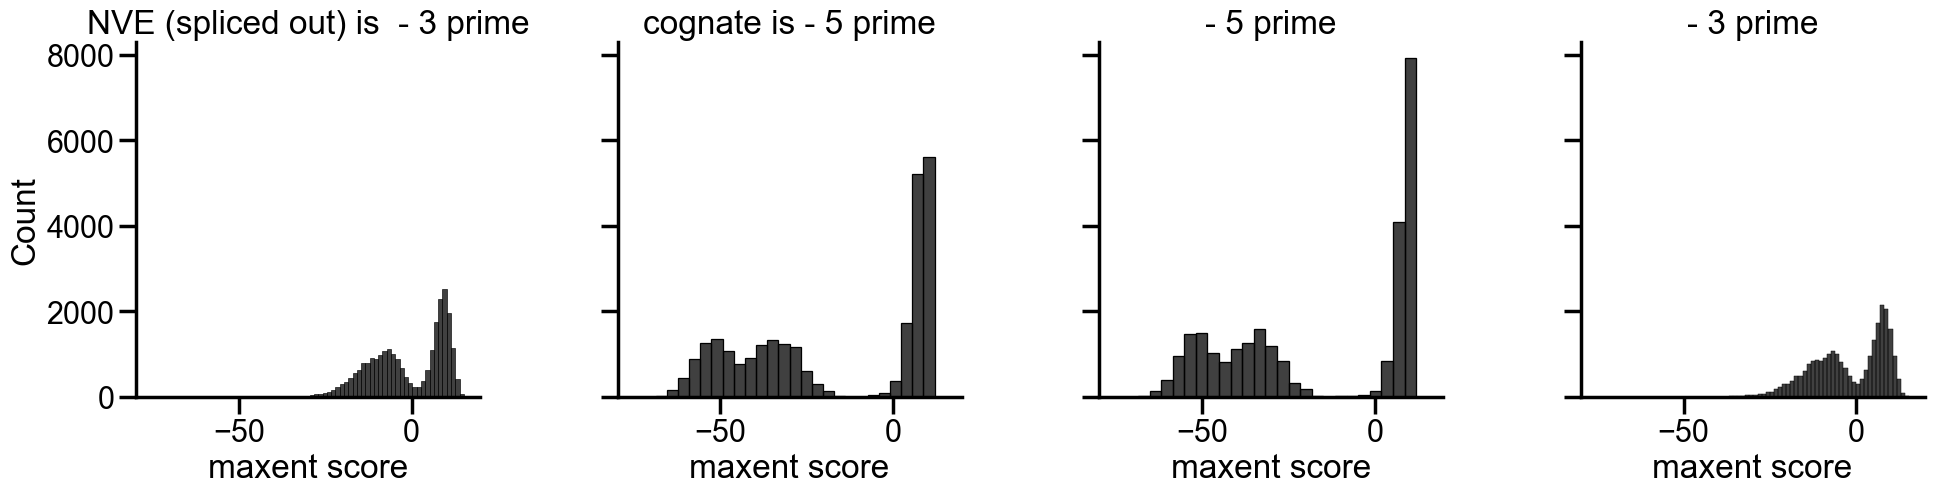

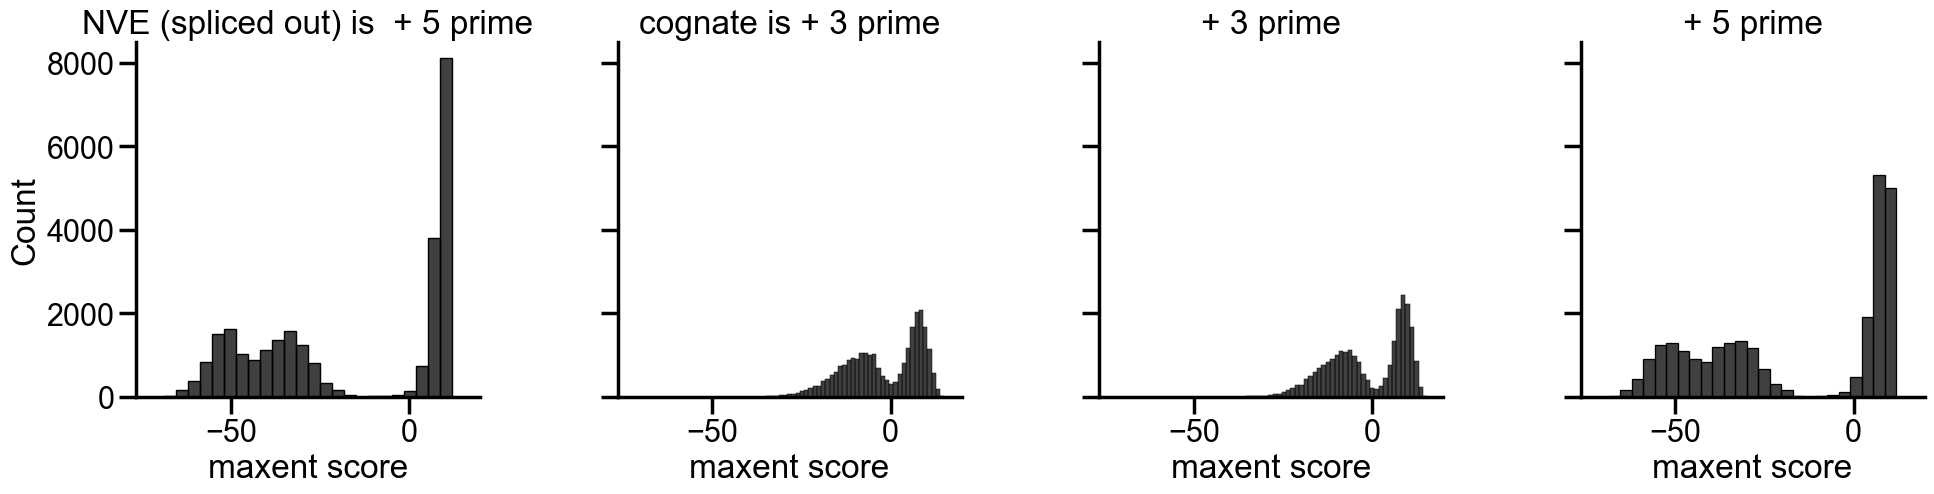

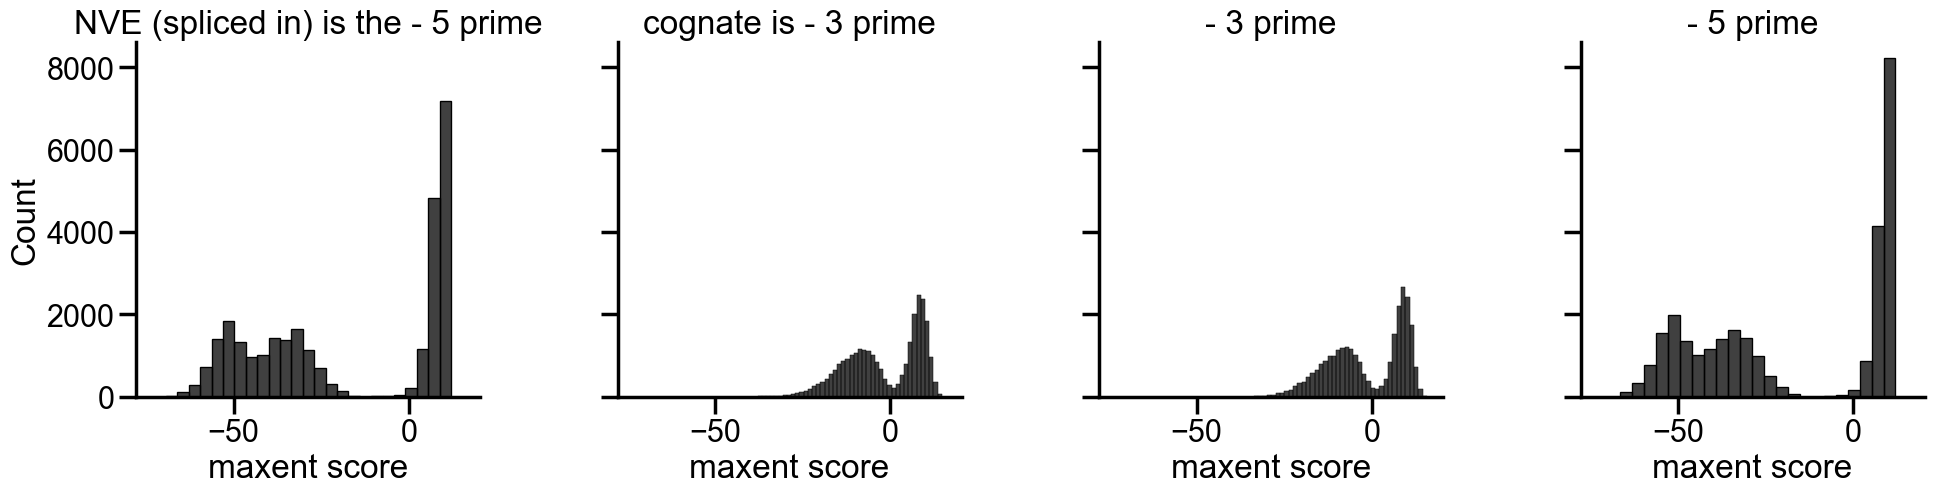

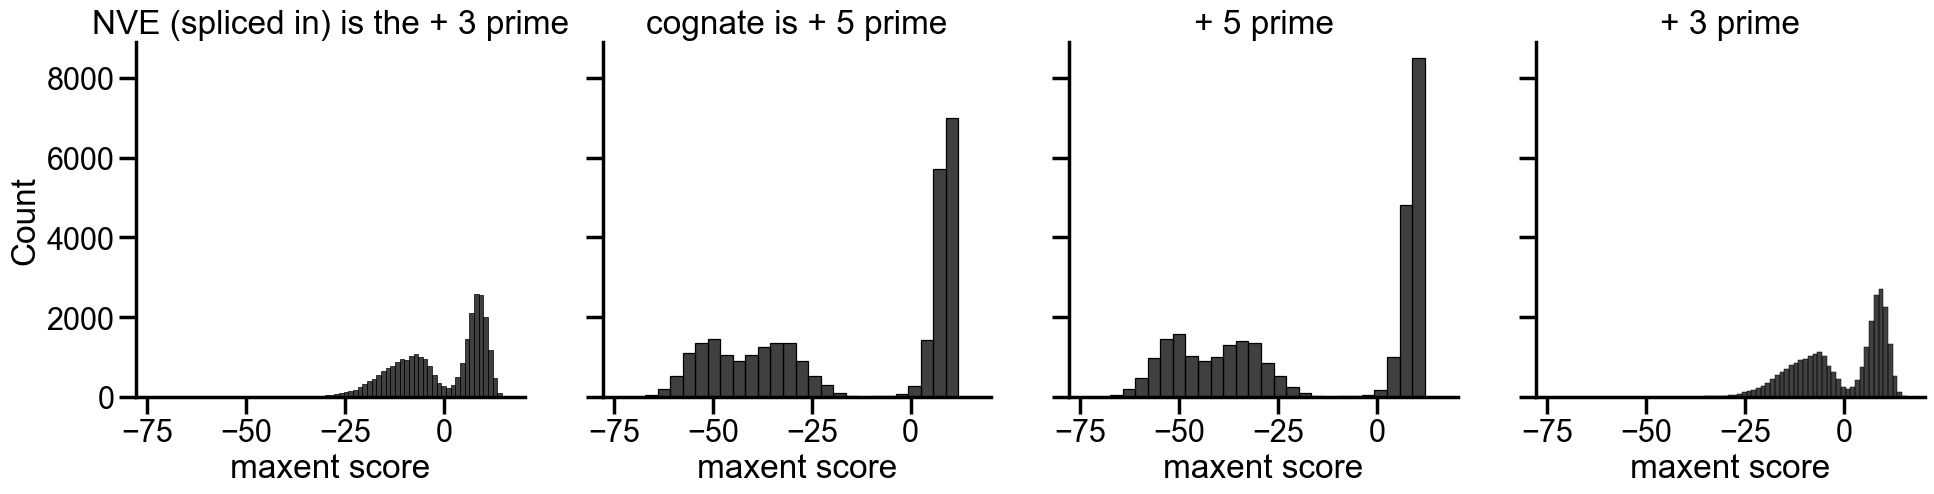

In [71]:
for ss in [neg_strand_inclusion, pos_strand_inclusion, neg_strand_exclusion, pos_strand_exclusion] :

    


    plot_scores_SE(ss)

assign strand based on maxent scores
--

In [72]:
neg_strand_inclusion, pos_strand_inclusion, neg_strand_exclusion, pos_strand_exclusion

neg_strand_inclusion_passed=neg_strand_inclusion[passed_threshold(neg_strand_inclusion, 'SE') ]# ((as_five_prime_pos.constant_ss_maxent_score) > (as_three_prime_pos.constant_ss_maxent_score))]

pos_strand_inclusion_passed=pos_strand_inclusion[passed_threshold(pos_strand_inclusion, 'SE') ]# & ((as_five_prime_pos.constant_ss_maxent_score) < (as_three_prime_pos.constant_ss_maxent_score))]

neg_strand_exclusion_passed=neg_strand_exclusion[passed_threshold(neg_strand_exclusion, 'SE') ]#& ((as_five_prime_neg.constant_ss_maxent_score) > (as_three_prime_neg.constant_ss_maxent_score))]

pos_strand_exclusion_passed=pos_strand_exclusion[passed_threshold(pos_strand_exclusion, 'SE') ]#& ((as_five_prime_neg.constant_ss_maxent_score) < (as_three_prime_neg.constant_ss_maxent_score))]
 



assigned_a_splice_site = len(neg_strand_inclusion_passed)+len(pos_strand_inclusion_passed)+len(neg_strand_exclusion_passed)+len(pos_strand_exclusion_passed)
#number skipped exons
assigned_a_splice_site/len(top_EF_all_tissues_skipped_exons)


0.9475469390024651

In [73]:
top_EF_all_tissues_skipped_exons_assigned_by_maxent=pd.concat([neg_strand_inclusion_passed, pos_strand_inclusion_passed, neg_strand_exclusion_passed, 
           pos_strand_exclusion_passed])


assign exon size
--

In [75]:
df = top_EF_all_tissues_skipped_exons_assigned_by_maxent

SE_exon_length=df.apply(lambda row: row['majority_ss_2']-row['majority_ss_1'] if row['minority_is_exclusion_event']==True 
                     else row['minority_ss_2']-row['majority_ss_2'], axis=1).abs()

top_EF_all_tissues_skipped_exons_assigned_by_maxent=top_EF_all_tissues_skipped_exons_assigned_by_maxent.assign(exon_length = SE_exon_length)



skipped_exons_500bp=top_EF_all_tissues_skipped_exons_assigned_by_maxent[top_EF_all_tissues_skipped_exons_assigned_by_maxent.exon_length<=500]

(0.0, 1000.0)

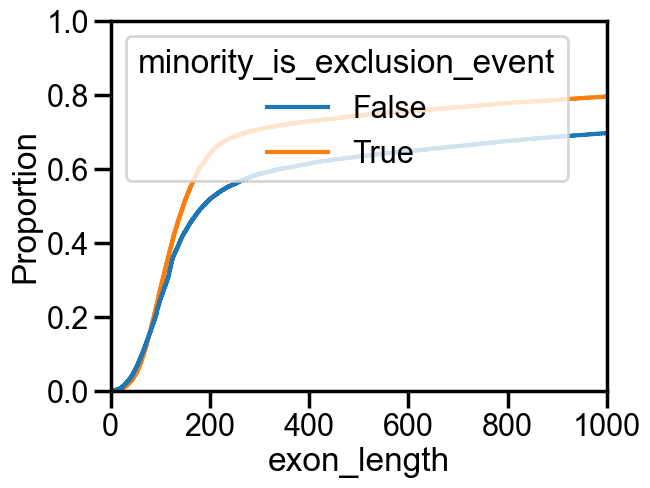

In [76]:
ax=sns.ecdfplot(data=top_EF_all_tissues_skipped_exons_assigned_by_maxent,x='exon_length',
                hue='minority_is_exclusion_event')
ax.set_xlim([0,1000])

In [77]:
skipped_exons_500bp=skipped_exons_500bp.assign(chromosome=skipped_exons_500bp.cluster_name.apply(lambda x: x.split(':')[0]))


assign genes using strand, filter for protein coding
--

In [79]:


df=skipped_exons_500bp

# release 77 uses human reference genome GRCh38
data = EnsemblRelease(102)

chromosome=df.cluster_name.apply(lambda x: (x.split(':')[0]))

chrom_only_value=df.chromosome.apply(lambda x: (x.split('chr')[1]))



df=df.assign(chrom_only_value=chrom_only_value)


# will return ['HLA-A']
gene_names = df.apply(lambda x: data.genes_at_locus(contig=x['chrom_only_value'], position=x['majority_ss_1_end'], end=x['majority_ss_1_end'], strand=x['strand']), axis=1)
   

has_at_least_one_gene=gene_names.apply(lambda x: len(x)>0)

df=df[list(has_at_least_one_gene)]



name = gene_names[has_at_least_one_gene].apply(lambda x: x[0].gene_name)

biotype = gene_names[has_at_least_one_gene].apply(lambda x: x[0].biotype)

strand = gene_names[has_at_least_one_gene].apply(lambda x: x[0].strand)



df=df.assign(biotype=biotype)

df=df.assign(gene_name=name)


protein_coding_genes_maxent_filtered_SE= df[df.biotype=='protein_coding']




plot maxent score differences
--

In [80]:
def plot_maxent_scores(df, minor, major, info_on_df):
    ax=sns.ecdfplot(data=df, x=df[minor], color='#B264FF', label='NVE splice')

    ax=sns.ecdfplot(data=df, x=df[major], color='black',  label='cognate splice')

    
    ax.set_xlim([0,12])
    ax.legend()
    ax.set_xlabel('maxent score '+info_on_df)
    sns.despine()


In [81]:
excluded = protein_coding_genes_maxent_filtered_SE[protein_coding_genes_maxent_filtered_SE.minority_is_exclusion_event]

included = protein_coding_genes_maxent_filtered_SE[protein_coding_genes_maxent_filtered_SE.minority_is_exclusion_event==False]



In [82]:
included=included.assign(columns={'majority_ss_2':'minority_ss_1',
                           'minority_ss_1':'majority_ss_2'})

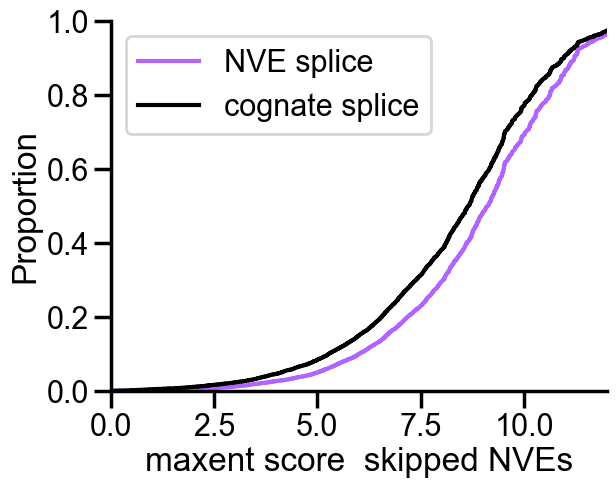

In [83]:
plot_maxent_scores(excluded,'minority_ss_1_maxent_score', 'majority_ss_1_maxent_score', ' skipped NVEs')

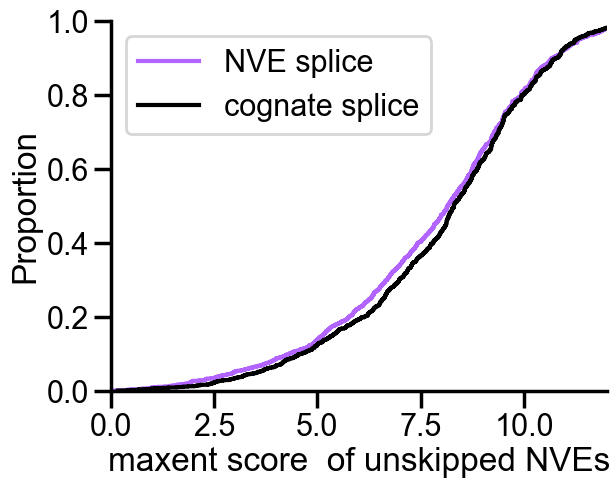

In [88]:


plot_maxent_scores(included[included.EF_5>=0.99],'minority_ss_2_maxent_score', 'majority_ss_2_maxent_score', ' of unskipped NVEs')

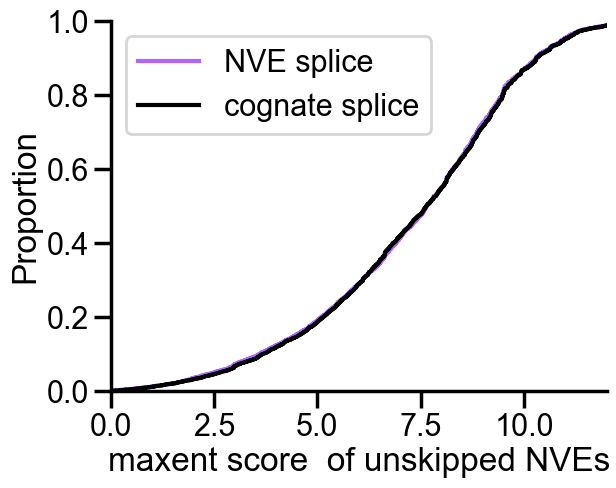

In [89]:
plot_maxent_scores(included[included.EF_5<0.99],'minority_ss_2_maxent_score', 'majority_ss_2_maxent_score', ' of unskipped NVEs')

Text(0.5, 0, 'size (bp) of NVE skipped exon')

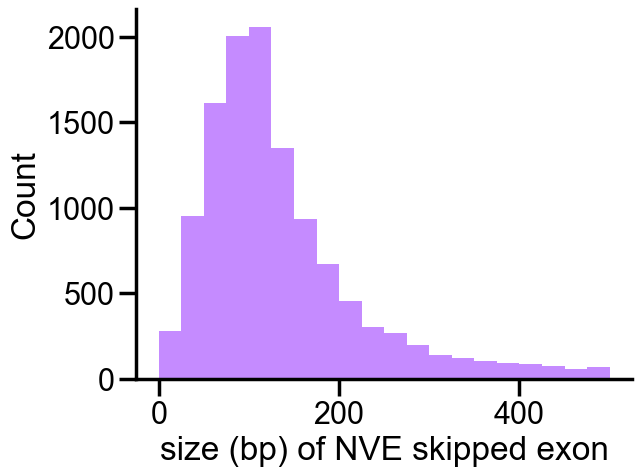

In [92]:
ax=sns.histplot(included.exon_length.abs(),  color='#B264FF', linewidth=0, bins=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('size (bp) of NVE skipped exon')


In [149]:
len(excluded)

16903

Text(0.5, 0, 'size (bp) of cognate skipped exon')

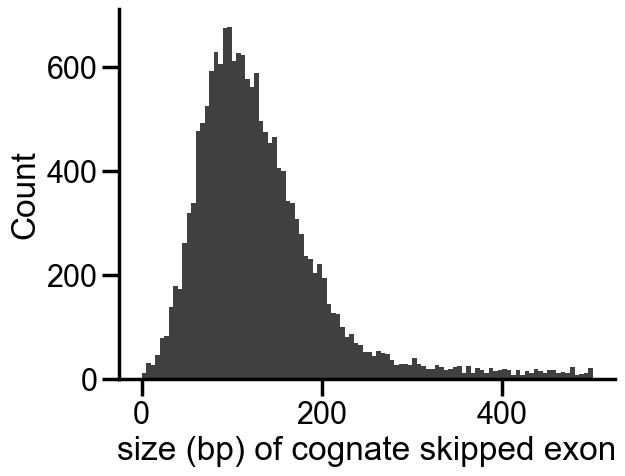

In [93]:

ax=sns.histplot(excluded.exon_length, color='black',linewidth=0, bins=100)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('size (bp) of cognate skipped exon')

make sure clusters match
--

In [190]:
protein_coding_genes_maxent_filtered_SE=pd.concat([included, excluded])

In [191]:
clu_1=protein_coding_genes_maxent_filtered_SE.intron_1.apply(lambda x: x.split(':')[3])


clu_2=protein_coding_genes_maxent_filtered_SE.intron_2.apply(lambda x: x.split(':')[3])

sum(clu_1!=clu_2)

protein_coding_genes_maxent_filtered_SE=protein_coding_genes_maxent_filtered_SE[clu_1==clu_2]

clu_1=protein_coding_genes_maxent_filtered_AS.intron_1.apply(lambda x: x.split(':')[3])


clu_2=protein_coding_genes_maxent_filtered_AS.intron_2.apply(lambda x: x.split(':')[3])

sum(clu_1!=clu_2)

protein_coding_genes_maxent_filtered_AS=protein_coding_genes_maxent_filtered_AS[clu_1==clu_2]

In [192]:
def replace_interval(interval):
    if interval.left == 0.9 and interval.right == 1.0 and interval.closed == 'right':
        return pd.Interval(0.9, 1.0, closed='left')
    return interval

# Apply the function to the interval column
EF_5_bin=protein_coding_genes_maxent_filtered_AS['EF_5_bin'].apply(replace_interval)

protein_coding_genes_maxent_filtered_AS = protein_coding_genes_maxent_filtered_AS.assign(EF_5_bin=EF_5_bin)


In [193]:
# Apply the function to the interval column
EF_5_bin=protein_coding_genes_maxent_filtered_SE['EF_5_bin'].apply(replace_interval)

protein_coding_genes_maxent_filtered_SE = protein_coding_genes_maxent_filtered_SE.assign(EF_5_bin=EF_5_bin)


<Axes: xlabel='EF_5', ylabel='Proportion'>

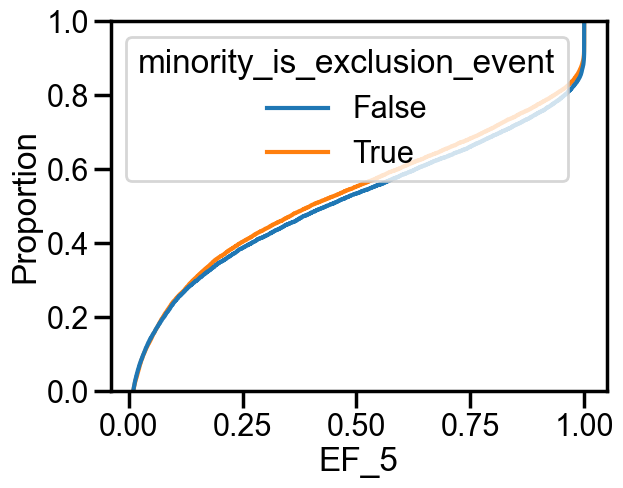

In [194]:
sns.ecdfplot(data=protein_coding_genes_maxent_filtered_SE,
             x='EF_5',
             hue='minority_is_exclusion_event')

In [195]:
NVEs_SEs=protein_coding_genes_maxent_filtered_SE[protein_coding_genes_maxent_filtered_SE.EF_5<=0.99]

<Axes: xlabel='EF_5', ylabel='Proportion'>

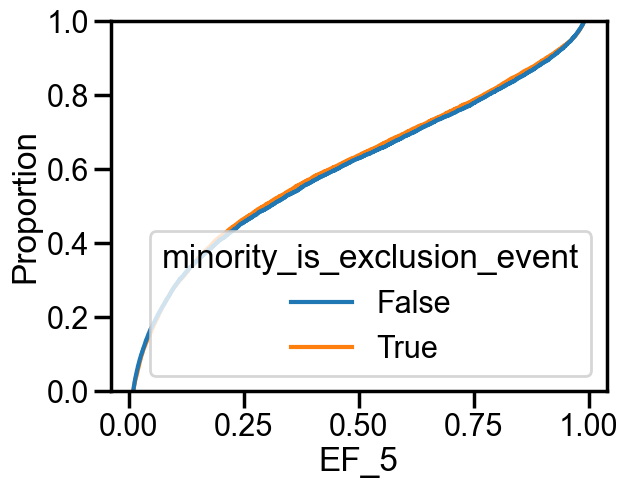

In [196]:
sns.ecdfplot(data=NVEs_SEs,
             x='EF_5',
             hue='minority_is_exclusion_event')

(0.0, 100.0)

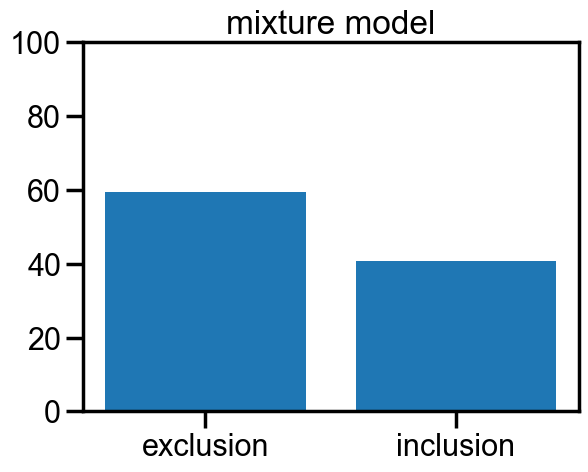

In [197]:
plt.title('mixture model')
plt.bar(x=['exclusion','inclusion'],height=NVEs_SEs.minority_is_exclusion_event.value_counts()/len(NVEs_SEs)*100)

plt.ylim([0,100])


(0.0, 100.0)

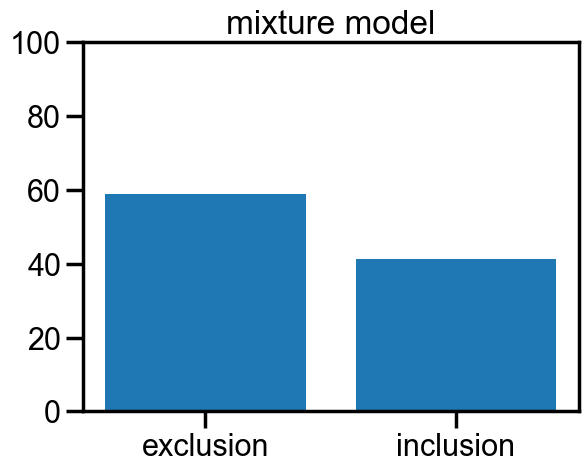

In [198]:
plt.title('mixture model')
plt.bar(x=['exclusion','inclusion'],height=protein_coding_genes_maxent_filtered_SE.minority_is_exclusion_event.value_counts()/len(protein_coding_genes_maxent_filtered_SE)*100)

plt.ylim([0,100])


In [181]:
single_model_data_SEs=pd.read_csv(data_directory+'old_NVEs_SE.csv')

(array([7290., 3078., 2067., 1777., 1455., 1441., 1448., 1540., 1761.,
        2847.]),
 array([0.01000597, 0.10800526, 0.20600456, 0.30400386, 0.40200316,
        0.50000246, 0.59800176, 0.69600106, 0.79400036, 0.89199966,
        0.98999895]),
 <BarContainer object of 10 artists>)

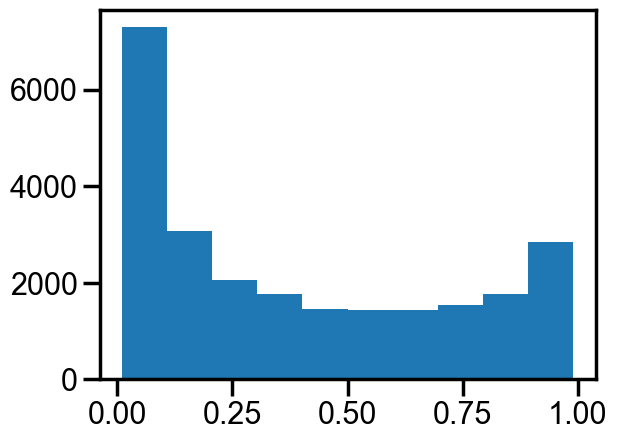

In [103]:
plt.hist(NVEs_SEs.EF_5)

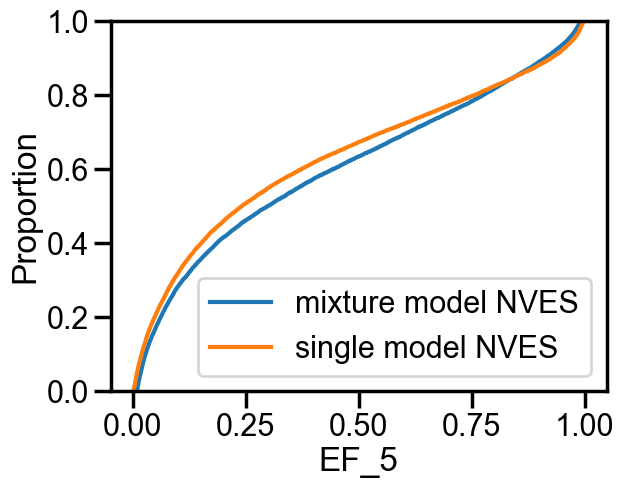

In [187]:
sns.ecdfplot(NVEs_SEs.EF_5, label='mixture model NVES')
sns.ecdfplot(single_model_data_SEs.EF_5, label='single model NVES')
plt.legend()

In [1505]:
#compare EFs

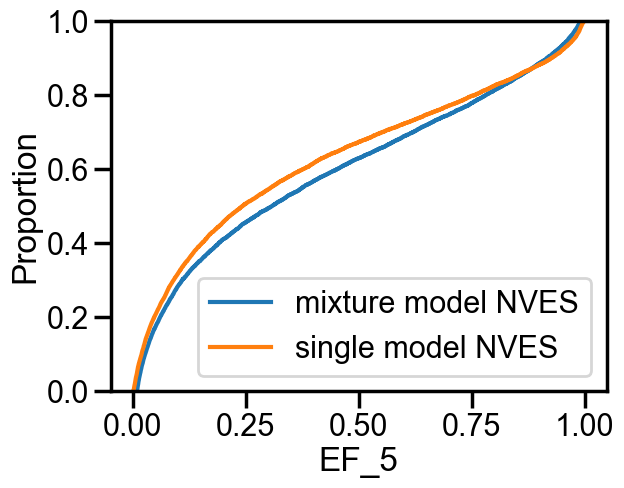

In [188]:
sns.ecdfplot(NVEs_SEs[NVEs_SEs.minority_is_exclusion_event==False].EF_5, label='mixture model NVES')
sns.ecdfplot(single_model_data_SEs[single_model_data_SEs.minority_is_exclusion_event==False].EF_5, label='single model NVES')
plt.legend()

filter out any NVE that is in basically 100% of people
--

In [199]:


#all_EF_all_tissues_skipped_exons_protein_coding=all_EF_all_tissues.merge(for_merge, on=['cluster_name_no_ID'])


protein_coding_genes_maxent_filtered_AS_NVEs=protein_coding_genes_maxent_filtered_AS[protein_coding_genes_maxent_filtered_AS.EF_5<=0.99]
protein_coding_genes_maxent_filtered_AS_non_NVEs=protein_coding_genes_maxent_filtered_AS[protein_coding_genes_maxent_filtered_AS.EF_5>0.99]



In [200]:
protein_coding_genes_maxent_filtered_SE_NVEs=protein_coding_genes_maxent_filtered_SE[protein_coding_genes_maxent_filtered_SE.EF_5 <0.99]

#protein_coding_genes_maxent_filtered_SE_NVEs=protein_coding_genes_maxent_filtered_SE[still_NVEs==True]
protein_coding_genes_maxent_filtered_SE_non_NVEs=protein_coding_genes_maxent_filtered_SE[protein_coding_genes_maxent_filtered_SE.EF_5 >=0.99]

#protein_coding_genes_maxent_filtered_SE_non_NVEs=protein_coding_genes_maxent_filtered_SE[still_NVEs]

In [111]:
data_directory='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/01_data/new_results/'

Filter for all events: SE
--

In [230]:
protein_coding_genes_maxent_filtered_SE[protein_coding_genes_maxent_filtered_SE.exon_length!=0]
protein_coding_genes_maxent_filtered_SE=protein_coding_genes_maxent_filtered_SE.assign(splicing_event_detailed=protein_coding_genes_maxent_filtered_SE.splicing_event)



for_merge = protein_coding_genes_maxent_filtered_SE[['cluster_name_no_ID'
    , 'strand','intron_1','intron_2','splicing_event_detailed',
   'majority_ss_1', 'minority_ss_1', 'minority_ss_2',
       'majority_ss_2', 'majority_ss_1_start', 'majority_ss_1_end',
       'majority_ss_2_start', 'majority_ss_2_end', 'minority_ss_1_start',
       'minority_ss_1_end', 'minority_ss_2_start', 'minority_ss_2_end',
       'majority_ss_1_seq', 'majority_ss_1_maxent_score', 'majority_ss_2_seq',
       'majority_ss_2_maxent_score', 'minority_ss_1_seq',
       'minority_ss_1_maxent_score', 'minority_ss_2_seq',
       'minority_ss_2_maxent_score', 'exon_length', 'chromosome',
       'chrom_only_value', 'biotype', 'gene_name']]

intron_1_no_name=all_EF_all_tissues_NVEs.intron_1.apply(lambda x: x.split(':clu')[0])
intron_1_top_no_name=all_EF_all_tissues_NVEs.intron_1.apply(lambda x: x.split(':clu')[0])
intron_2_top_no_name=all_EF_all_tissues_NVEs.intron_2.apply(lambda x: x.split(':clu')[0])

all_EF_NVEs_all_tissues_SE_protein_coding=all_EF_all_tissues_NVEs[intron_1_no_name.isin(intron_1_top_no_name) | intron_1_no_name.isin(intron_2_top_no_name )]

all_EF_all_tissues_SE_protein_coding=all_EF_all_tissues.merge(for_merge, on=['cluster_name_no_ID'])

still_NVEs_SE=all_EF_all_tissues_SE_protein_coding[all_EF_all_tissues_SE_protein_coding.EF_5<=0.99]

all_EF_NVEs_tissues_SE_protein_coding=still_NVEs_SE


not_NVEs_SE=all_EF_all_tissues_SE_protein_coding[all_EF_all_tissues_SE_protein_coding.EF_5>0.99]


In [153]:
all_EF_all_tissues_skipped_exons_protein_coding=all_EF_all_tissues.merge(for_merge, on=['cluster_name_no_ID'])

#still_NVEs_SE=all_EF_all_tissues_skipped_exons_protein_coding[all_EF_all_tissues_skipped_exons_protein_coding.cluster_name_no_ID.isin(protein_coding_genes_maxent_filtered_SE_NVEs.cluster_name_no_ID)]
#.EF_5 <= 1 - (1/ all_EF_all_tissues_alt_ss_protein_coding.number_people_in_sample)

#all_EF_NVEs_all_tissues_alt_ss_protein_coding=all_EF_all_tissues_alt_ss_protein_coding[still_NVEs]
#not_NVEs_SE=all_EF_all_tissues_skipped_exons_protein_coding[~all_EF_all_tissues_skipped_exons_protein_coding.cluster_name_no_ID.isin(protein_coding_genes_maxent_filtered_SE_NVEs.cluster_name_no_ID)]


still_NVEs_SE=all_EF_all_tissues_skipped_exons_protein_coding[all_EF_all_tissues_skipped_exons_protein_coding.EF_5<0.99]
not_NVEs_SE=all_EF_all_tissues_skipped_exons_protein_coding[all_EF_all_tissues_skipped_exons_protein_coding.EF_5>=0.99]


 filter for all events: alt ss
--

In [176]:
protein_coding_genes_maxent_filtered_AS=protein_coding_genes_maxent_filtered_AS.assign(splicing_event_detailed=protein_coding_genes_maxent_filtered_AS.splicing_event)


top_EF_non_NVE_AS=protein_coding_genes_maxent_filtered_AS[protein_coding_genes_maxent_filtered_AS.EF_5>0.99]

top_EF_NVE_AS=protein_coding_genes_maxent_filtered_AS[protein_coding_genes_maxent_filtered_AS.EF_5<=0.99]



In [181]:
import math



for_merge = protein_coding_genes_maxent_filtered_AS[['cluster_name_no_ID',
     'minority_ss', 'constant_ss', 'majority_ss','splicing_event_detailed',
       'ss_d', 'strand',  'minority_ss_start',
       'minority_ss_end', 'majority_ss_start', 'majority_ss_end',
       'constant_ss_start', 'constant_ss_end', 'constant_ss_seq',
       'constant_ss_maxent_score', 'minor_ss_seq', 'minority_ss_maxent_score',
       'major_ss_seq', 'majority_ss_maxent_score', 'exon_length', 'ss_c',
       'chromosome', 'chrom_only_value', 'biotype', 'gene_name']]

all_EF_all_tissues_alt_ss_protein_coding=all_EF_all_tissues.merge(for_merge, on=['cluster_name_no_ID'])

still_NVEs_AS=all_EF_all_tissues_alt_ss_protein_coding[all_EF_all_tissues_alt_ss_protein_coding.EF_5<=0.99]

not_NVEs_AS=all_EF_all_tissues_alt_ss_protein_coding[all_EF_all_tissues_alt_ss_protein_coding.EF_5>0.99]


In [240]:
all_non_NVEs_old=pd.read_parquet(data_directory + 'all_non_NVE_protein_coding.parquet',  
                    
)

In [244]:
all_non_NVEs_old.splicing_event.value_counts()

splicing_event
alt_splice_site    35778
skipped_exon       15772
Name: count, dtype: int64

In [148]:
#for_merge = protein_coding_genes_maxent_filtered_AS[['cluster_name_no_ID','splicing_event_detailed',
     'minority_ss', 'constant_ss', 'majority_ss',
       'ss_d', 'strand',  'minority_ss_start',
       'minority_ss_end', 'majority_ss_start', 'majority_ss_end',
       'constant_ss_start', 'constant_ss_end', 'constant_ss_seq',
       'constant_ss_maxent_score', 'minor_ss_seq', 'minority_ss_maxent_score',
       'major_ss_seq', 'majority_ss_maxent_score', 'exon_length', 'ss_c',
       'chromosome', 'chrom_only_value', 'biotype', 'gene_name']]

#all_EF_all_tissues_alt_ss_protein_coding=all_EF_all_tissues.merge(for_merge, on=['cluster_name_no_ID'])

#still_NVEs_AS=all_EF_all_tissues_alt_ss_protein_coding[all_EF_all_tissues_alt_ss_protein_coding.cluster_name_no_ID.isin(protein_coding_genes_maxent_filtered_AS_NVEs.cluster_name_no_ID)]
#.EF_5 <= 1 - (1/ all_EF_all_tissues_alt_ss_protein_coding.number_people_in_sample)
#still_NVEs_AS=all_EF_all_tissues_alt_ss_protein_coding[all_EF_all_tissues_alt_ss_protein_coding.EF_5<0.99]
#all_EF_NVEs_all_tissues_alt_ss_protein_coding=all_EF_all_tissues_alt_ss_protein_coding[still_NVEs]
#not_NVEs_AS=all_EF_all_tissues_alt_ss_protein_coding[~all_EF_all_tissues_alt_ss_protein_coding.cluster_name_no_ID.isin(protein_coding_genes_maxent_filtered_AS_NVEs.cluster_name_no_ID)]

#not_NVEs_AS=all_EF_all_tissues_alt_ss_protein_coding[all_EF_all_tissues_alt_ss_protein_coding.EF_5>=0.99]


/var/folders/20/mx4zvjpx5_n_bftbxj9cyg0r0000gn/T/ipykernel_11209/1341675094.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


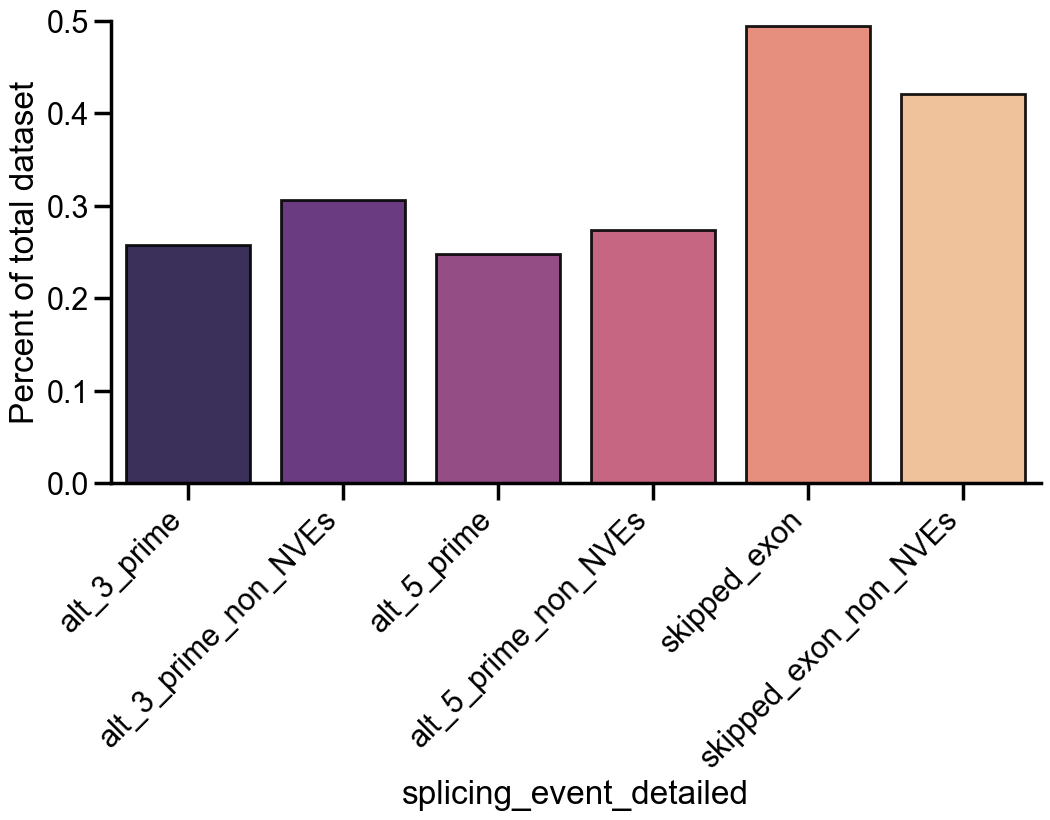

In [255]:
non_NVEs = pd.concat([not_NVEs_SE, not_NVEs_AS])

non_NVEs['splicing_event_detailed']=non_NVEs.splicing_event_detailed+'_non_NVEs'

top_EF_non_NVEs=non_NVEs.sort_values(by='EF_5', ascending=False).drop_duplicates(subset='cluster_name_no_ID')



still_NVEs = pd.concat([still_NVEs_SE, still_NVEs_AS])

top_EF_NVEs=still_NVEs.sort_values(by='EF_5', ascending=False).drop_duplicates(subset='cluster_name_no_ID')


num_events_all= pd.concat([(top_EF_non_NVEs.splicing_event_detailed.value_counts()/len(top_EF_non_NVEs)).to_frame().reset_index(),
                          (top_EF_NVEs.splicing_event_detailed.value_counts()/len(top_EF_NVEs)).to_frame().reset_index()
                          
                          ])

num_events_all

plt.figure(figsize=(12, 6))  # Width=12, Height=6 (you can adjust)

# Create the barplot
sns.barplot(
    data=num_events_all,
    x='splicing_event_detailed', order=sorted(list(set(num_events_all.splicing_event_detailed))),
    y='count', edgecolor='black',alpha=0.9,
    palette='magma'
)
plt.ylabel('Percent of total dataset')
# Rotatax.set_ylabel('percent of total')e x-axis labels
plt.xticks(rotation=45, ha='right')  # 45 degrees rotation, right-aligned
plt.ylim([0,0.5])
# Clean up the plot
sns.despine()



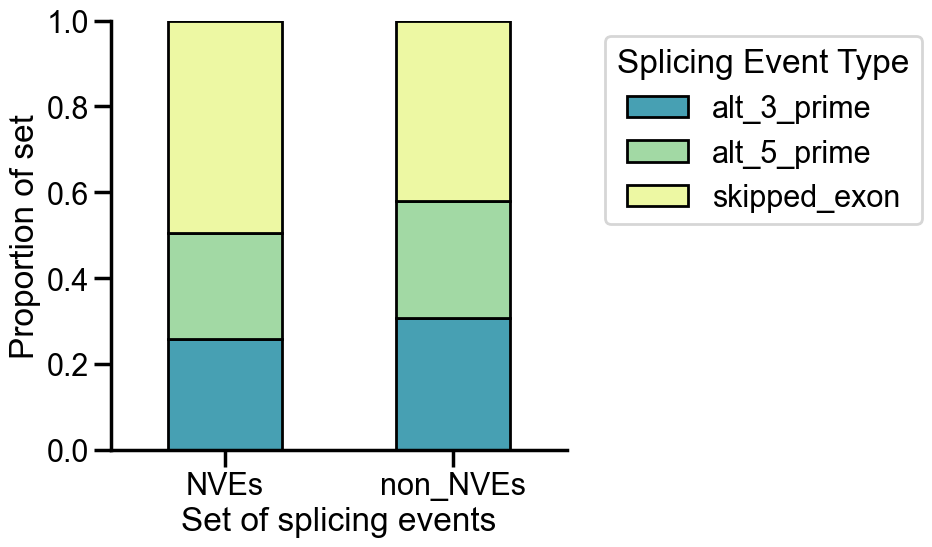

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assign group labels
top_EF_non_NVEs['group'] = 'non_NVEs'
top_EF_NVEs['group'] = 'NVEs'

# Clean up event labels to match
top_EF_non_NVEs['event'] = top_EF_non_NVEs['splicing_event_detailed'].str.replace('_non_NVEs', '', regex=False)
top_EF_NVEs['event'] = top_EF_NVEs['splicing_event_detailed']

# Combine and tag both
combined = pd.concat([top_EF_non_NVEs, top_EF_NVEs])

# Count by group and event
event_counts = combined.groupby(['group', 'event']).size().reset_index(name='count')

# Normalize
event_counts['percent'] = event_counts.groupby('group')['count'].transform(lambda x: x / x.sum())

# Pivot
plot_df = event_counts.pivot(index='group', columns='event', values='percent').fillna(0)

# Ensure consistent column order
event_order = sorted(plot_df.columns)
plot_df = plot_df[event_order]

# Choose paired colors (6 unique ones repeated in order)
base_colors = sns.color_palette("Spectral_r", n_colors=6)
paired_colors = base_colors  # One color per event

# Plot
plot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='black',
    color=paired_colors
)
plt.xlabel('Set of splicing events')
plt.ylabel('Proportion of set')
plt.xticks(rotation=0)
plt.ylim([0, 1])
plt.legend(title='Splicing Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
sns.despine()
plt.show()

In [121]:
num_tissues_EFs=num_tissues.reset_index().merge(all_EF_all_tissues_alt_ss_protein_coding[['EF_5_bin','EF_20','EF_10','EF_5','cluster_name_no_ID']].sort_values(by='EF_5',ascending=False),
                                on='cluster_name_no_ID')

In [122]:
num_tissues_EFs_counts=num_tissues_EFs.drop_duplicates(subset='cluster_name_no_ID')

/opt/anaconda3/envs/running_hail_env/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'thres'
  cset = contour_func(


<Axes: xlabel='EF_10', ylabel='count'>

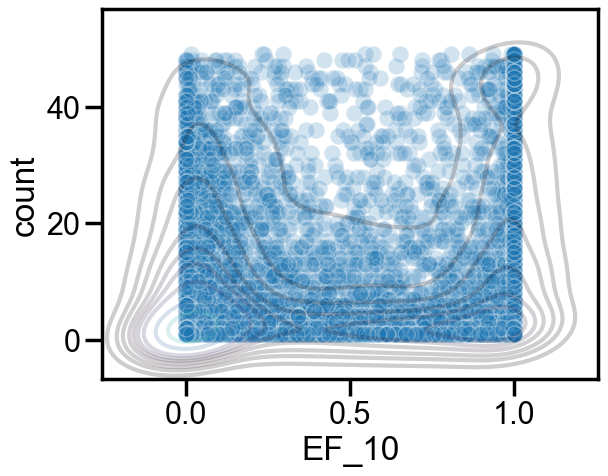

In [123]:
#even when EF 10 is near 100, there arent many at the highest peak, many NVEs even at high EFs are tissues specific
sns.scatterplot(data=num_tissues_EFs_counts.sample(10000),
                y='count', x='EF_10', alpha=0.2)
sns.kdeplot(data=num_tissues_EFs_counts.sample(10000),
                y='count', x='EF_10', alpha=0.2,thres=0,cmap='mako')

In [124]:
protein_coding_genes_maxent_filtered_AS_NVEs.params_triple

36916    [ 2.01796024 10.4409775  30.78917074  9.055023...
19056    [ 3.29816004 13.36500196 15.18250741 15.069987...
6672     [20.1078781   1.97125615  2.78016614 84.066332...
20796    [5.06989194e+00 2.94645132e+04 1.29832299e+00 ...
16933    [3.31603773e-03 9.36467037e+17 2.50724309e-03 ...
                               ...                        
21098    [3.00821021e-01 2.02687098e-01 3.10286923e+01 ...
7818     [1.17720784e+00 2.01189771e-01 1.14519537e+00 ...
23977    [1.20863901e+00 2.89518884e-01 1.89629123e+02 ...
16122    [7.39072177e-02 9.36147260e+00 3.46003584e+00 ...
4916     [7.95756049e-01 1.10586405e+00 1.04012112e+06 ...
Name: params_triple, Length: 24160, dtype: object

In [125]:
#protein_coding_genes_maxent_filtered_SE_NVEs[cols_to_convert] = protein_coding_genes_maxent_filtered_SE_NVEs[cols_to_convert].apply(lambda s: np.fromstring(s.strip("[]"), sep=" ") if isinstance(s, str) else np.nan)


#params_triple_rounded=protein_coding_genes_maxent_filtered_SE_NVEs.params_triple.apply(lambda x:  [float(i) for i in x])

#protein_coding_genes_maxent_filtered_SE_NVEs.params_triple
still_NVEs_SE=protein_coding_genes_maxent_filtered_SE_NVEs[protein_coding_genes_maxent_filtered_SE_NVEs.EF_5<=0.99]
not_NVEs_SE=protein_coding_genes_maxent_filtered_SE_NVEs[protein_coding_genes_maxent_filtered_SE_NVEs.EF_5>0.99]
#sns.histplot(still_NVEs_SE.EF_5)

#sns.histplot(still_NVEs_AS.EF_5)

In [375]:
internal_data_directory='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/results_post_reviews/01_data/'


output all EF tables to internal directory
--

In [127]:
all_EF_all_tissues_alt_ss_protein_coding+all_EF_NVEs_all_tissues_SE_protein_coding

NameError: name 'all_EF_all_tissues_SE_protein_coding' is not defined

In [397]:
all_non_NVEs = pd.concat([not_NVEs_SE,not_NVEs_AS])

top_EF_all_non_NVEs = all_non_NVEs.sort_values(by='EF_5', ascending=False).drop_duplicates(subset='cluster_name_no_ID', keep='first'
)

/var/folders/20/mx4zvjpx5_n_bftbxj9cyg0r0000gn/T/ipykernel_1300/1021349049.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_non_NVEs = pd.concat([not_NVEs_SE,not_NVEs_AS])


In [398]:
for_export = still_NVEs_AS[['total_reads_spanning_all_junctions',
       'function_output_emp_bayes', 'number_people_in_sample', 
       'params_triple', 'pvalue_dip'
       , 'tissue', 'splicing_event', 'intron_1', 'intron_2',
       'cluster_name', 'EF_1', 'EF_5', 'EF_10', 'EF_20', 'EF_5_bin',
       'cluster_name_no_ID',
       'ID', 'minority_is_exclusion_event', 'minority_ss',
       'constant_ss', 'majority_ss', 'ss_d', 'strand', 'minority_ss_start',
       'minority_ss_end', 'majority_ss_start', 'majority_ss_end',
       'constant_ss_start', 'constant_ss_end', 'constant_ss_seq',
       'constant_ss_maxent_score', 'minor_ss_seq', 'minority_ss_maxent_score',
       'major_ss_seq', 'majority_ss_maxent_score', 'exon_length', 'ss_c',
       'chromosome', 'chrom_only_value', 'biotype', 'gene_name']]

In [399]:
import ast

In [400]:
cols_to_convert='params_triple'

In [401]:
#still_NVEs_AS[cols_to_convert] = still_NVEs_AS[cols_to_convert].apply(lambda s: np.fromstring(s.strip("[]"), sep=" ") if isinstance(s, str) else np.nan)



In [299]:
#for_export.to_hdf(data_directory + 'all_EF_all_tissues_alt_ss_protein_coding.h5',
                    #  key='df', mode='w')

In [402]:
import gzip

In [403]:


#still_NVEs_SE.to_parquet(data_directory+'all_EF_all_tissues_skipped_exons_protein_coding.parquet')

In [404]:


still_NVEs_SE[['total_reads_spanning_all_junctions',
       'function_output_emp_bayes', 'number_people_in_sample',
      'params_triple','pvalue_dip',
        'tissue', 'splicing_event', 'intron_1', 'intron_2',
       'cluster_name', 'EF_1', 'EF_5', 'EF_10', 'EF_20', 'EF_5_bin',
       'cluster_name_no_ID', 
       'ID', 'minority_is_exclusion_event',  'intron_skipped',
       'intron_2_unskipped', 'intron_1_unskipped', 'minority_ss',
       'constant_ss', 'majority_ss', 'ss_d', 'strand', 'minority_ss_start',
       'minority_ss_end', 'majority_ss_start', 'majority_ss_end',
       'constant_ss_start', 'constant_ss_end', 'constant_ss_seq',
       'constant_ss_maxent_score', 'minor_ss_seq', 'minority_ss_maxent_score',
       'major_ss_seq', 'majority_ss_maxent_score', 'exon_length', 'ss_c',
       'chromosome', 'chrom_only_value', 'biotype', 'gene_name']].to_parquet(data_directory+'all_EF_all_tissues_skipped_exons_protein_coding.parquet')



KeyError: "['minority_ss', 'constant_ss', 'majority_ss', 'ss_d', 'minority_ss_start', 'minority_ss_end', 'majority_ss_start', 'majority_ss_end', 'constant_ss_start', 'constant_ss_end', 'constant_ss_seq', 'constant_ss_maxent_score', 'minor_ss_seq', 'minority_ss_maxent_score', 'major_ss_seq', 'majority_ss_maxent_score', 'ss_c'] not in index"

skipped exons: take mean maxent score for assign
--

In [405]:
all_EF_NVEs_all_tissues_skipped_exons_protein_coding=still_NVEs_SE


In [406]:
still_NVEs_SE.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'total_reads_spanning_all_junctions',
       'function_output_emp_bayes', 'number_people_in_sample', 'params',
       'cluster_name', 'LogLikelihood', 'LogLikelihood_triple',
       'LogLikelihood_double', 'params_triple', 'params_double', 'pvalue_LR',
       'pvalue_dip', 'tissue', 'splicing_event', 'intron_1', 'intron_2',
       'EF_1', 'EF_5', 'EF_10', 'EF_20', 'EF_5_bin', 'cluster_name_no_ID',
       'Unnamed: 0_x', 'Unnamed: 0_y', 'ID', 'minority_is_exclusion_event',
       'intron_skipped', 'intron_2_unskipped', 'intron_1_unskipped', 'strand',
       'majority_ss_1', 'minority_ss_1', 'minority_ss_2', 'majority_ss_2',
       'majority_ss_1_start', 'majority_ss_1_end', 'majority_ss_2_start',
       'majority_ss_2_end', 'minority_ss_1_start', 'minority_ss_1_end',
       'minority_ss_2_start', 'minority_ss_2_end', 'majority_ss_1_seq',
       'majority_ss_1_maxent_score', 'majority_ss_2_seq',
       'majority_ss_2_maxent_score', 'minority_ss_1_seq'

In [407]:
majority_ss_maxent_score = still_NVEs_SE[['majority_ss_1_maxent_score', 'majority_ss_2_maxent_score']].mean(axis=1)

minority_ss_maxent_score =still_NVEs_SE[['minority_ss_1_maxent_score', 'minority_ss_2_maxent_score']].mean(axis=1)

still_NVEs_SE=still_NVEs_SE.assign(majority_ss_maxent_score = majority_ss_maxent_score)

still_NVEs_SE=still_NVEs_SE.assign(minority_ss_maxent_score = minority_ss_maxent_score)


In [408]:


still_NVEs_SE[['total_reads_spanning_all_junctions',
       'function_output_emp_bayes', 'number_people_in_sample',
      'params_triple','pvalue_dip',
       'cluster_name_new', 'tissue', 'splicing_event', 'intron_1', 'intron_2',
       'cluster_name', 'EF_1', 'EF_5', 'EF_10', 'EF_20', 'EF_5_bin',
       'cluster_name_no_ID', 
       'ID', 'minority_is_exclusion_event',  'intron_skipped',
       'intron_2_unskipped', 'intron_1_unskipped', 'minority_ss',
       'constant_ss', 'majority_ss', 'ss_d', 'strand', 'minority_ss_start',
       'minority_ss_end', 'majority_ss_start', 'majority_ss_end',
       'constant_ss_start', 'constant_ss_end', 'constant_ss_seq',
       'constant_ss_maxent_score', 'minor_ss_seq', 'minority_ss_maxent_score',
       'major_ss_seq', 'majority_ss_maxent_score', 'exon_length', 'ss_c',
       'chromosome', 'chrom_only_value', 'biotype', 'gene_name']].to_csv(data_directory+'all_EF_all_tissues_skipped_exons_protein_coding.csv.gz',
            header=True
         , index=False
         , chunksize=1000
         , compression='gzip'
         , encoding='utf-8')

KeyError: "['cluster_name_new', 'minority_ss', 'constant_ss', 'majority_ss', 'ss_d', 'minority_ss_start', 'minority_ss_end', 'majority_ss_start', 'majority_ss_end', 'constant_ss_start', 'constant_ss_end', 'constant_ss_seq', 'constant_ss_maxent_score', 'minor_ss_seq', 'major_ss_seq', 'ss_c'] not in index"

# release for supplmental tables
--

In [417]:
still_NVEs_AS.splicing_event_detailed

1         alt_3_prime
2         alt_5_prime
3         alt_3_prime
5         alt_3_prime
6         alt_5_prime
             ...     
287003    alt_3_prime
287004    alt_3_prime
287005    alt_3_prime
287006    alt_3_prime
287009    alt_3_prime
Name: splicing_event_detailed, Length: 241662, dtype: object

In [411]:
#still_NVEs_SE=still_NVEs_SE.assign(intron_1=still_NVEs_SE.intron_1_x)

#still_NVEs_SE=still_NVEs_SE.assign(intron_2=still_NVEs_SE.intron_2_x)

In [418]:
all_EF_for_supplemental_figure_alt_ss = still_NVEs_AS[['cluster_name_no_ID',
                                               'intron_1', 'intron_2',
                                              'tissue',
                                             'total_reads_spanning_all_junctions',
                                               'params_triple',
                                            'splicing_event_detailed',
                                           'function_output_emp_bayes',

                                               'EF_1','EF_5','EF_10', 'EF_20',
                                               'EF_5_bin',
                                              'exon_length', 
                                               'splicing_event',
                                             'gene_name',
                                               'strand',  
                                                'minority_ss_maxent_score' ,
                                                'majority_ss_maxent_score',                                      
                                           
    
                                                      ]]
                                               
all_EF_for_supplemental_figure_SEs = still_NVEs_SE[['cluster_name_no_ID',
                                               'intron_1', 'intron_2',
                                              'tissue',
                                             'total_reads_spanning_all_junctions',
                                               'params_triple',
                                        
                                           'function_output_emp_bayes',

                                               'EF_1','EF_5','EF_10', 'EF_20',
                                               'EF_5_bin',
                                              'exon_length', 
                                               'splicing_event',
                                             'gene_name',
                                               'strand',  
                                                'minority_ss_maxent_score' ,
                                                'majority_ss_maxent_score',                                      
                                           ]]                                               

table 1 all EF NVEs
-

In [413]:
for_table_1= pd.concat([all_EF_for_supplemental_figure_SEs, 
           all_EF_for_supplemental_figure_alt_ss])

In [419]:
len(for_table_1)

266366

In [347]:
#all_EFs_background_df_alt_ss
#all_EFs_background_df_se

supplemental_data_directory='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/01_data/supplemental_files_for_paper'

In [348]:
# Apply the function to the interval column
EF_5_bin=for_table_1['EF_5_bin'].apply(replace_interval)

for_table_1 = for_table_1.assign(EF_5_bin=EF_5_bin)


In [ ]:
for_table_1.to_csv(supplemental_data_directory+'/all_EF_NVEs.csv.gz',
                   compression='gzip', 
                   index=False)

table 2 top EF NVEs
--

In [349]:
majority_ss_maxent_score = protein_coding_genes_maxent_filtered_SE[['majority_ss_1_maxent_score', 'majority_ss_2_maxent_score']].mean(axis=1)

minority_ss_maxent_score =protein_coding_genes_maxent_filtered_SE[['minority_ss_1_maxent_score', 'minority_ss_2_maxent_score']].mean(axis=1)

protein_coding_genes_maxent_filtered_SE=protein_coding_genes_maxent_filtered_SE.assign(majority_ss_maxent_score = majority_ss_maxent_score)

protein_coding_genes_maxent_filtered_SE=protein_coding_genes_maxent_filtered_SE.assign(minority_ss_maxent_score = minority_ss_maxent_score)


In [351]:
#protein_coding_genes_maxent_filtered_AS[['cluster_name_no_ID',

top_EF_for_supplemental_figure_alt_ss = protein_coding_genes_maxent_filtered_SE[['cluster_name_no_ID',
                                               'intron_1', 'intron_2',
                                              'tissue',
                                             'total_reads_spanning_all_junctions',
                                               'params_triple','pvalue_dip',
                                           'function_output_emp_bayes',

                                               'EF_1','EF_5','EF_10', 'EF_20',
                                               'EF_5_bin',
                                              'exon_length', 
                                               'splicing_event',
                                             'gene_name',
                                               'strand',  
                                                'minority_ss_maxent_score' ,
                                                'majority_ss_maxent_score',                                      
                                           ]]
                                               
top_EF_for_supplemental_figure_SEs = protein_coding_genes_maxent_filtered_AS[['cluster_name_no_ID',
                                               'intron_1', 'intron_2',
                                              'tissue',
                                             'total_reads_spanning_all_junctions',
                                                  'params_triple','pvalue_dip',
                                           'function_output_emp_bayes',

                                               'EF_1','EF_5','EF_10', 'EF_20',
                                               'EF_5_bin',
                                              'exon_length', 
                                               'splicing_event',
                                             'gene_name',
                                               'strand',  
                                                'minority_ss_maxent_score' ,
                                                'majority_ss_maxent_score',                                      
                                           ]]                                               

,Unnamed: 0.1,Unnamed: 0,total_reads_spanning_all_junctions,function_output_emp_bayes,number_people_in_sample,params,cluster_name,LogLikelihood,LogLikelihood_triple,LogLikelihood_double,...,minority_ss_2_maxent_score,exon_length,chromosome,chrom_only_value,biotype,gene_name,columns,splicing_event_detailed,majority_ss_maxent_score,minority_ss_maxent_score
253413,4,NaN,45783,[ message: CONVERGENCE: REL_REDUCTION_OF_F_<=...,194,[53.91722651 40.15323776 22.35939672 68.844893...,chr6:152122676:152130720:clu_29541_chr6:152122...,[-2482.28215636],[-2482.28215636],[-1645.52962154],...,6.030110,59,chr6,6,protein_coding,SYNE1,NaN,skipped_exon,9.784680,6.872699
195001,5,NaN,7866,[ message: CONVERGENCE: REL_REDUCTION_OF_F_<=...,483,[5.01470989e+01 4.81844476e+01 2.14247725e+02 ...,chr10:472549:484781:clu_8180_chr10:472549:4864...,[-3037.0390984],[-3037.0390984],[-1992.3293913],...,7.008615,168,chr10,10,protein_coding,DIP2C,NaN,skipped_exon,7.624414,6.573697
251703,4,NaN,84,[ message: CONVERGENCE: REL_REDUCTION_OF_F_<=...,194,[3.75670663e+02 4.09835562e+02 4.14685556e+02 ...,chr4:52745943:52750710:clu_32465_chr4:52745943...,[-95.78024954],[-151.40603428],[-95.78024954],...,8.226605,120,chr4,4,protein_coding,ERVMER34-1,NaN,skipped_exon,8.795535,9.255417
251532,4,NaN,64073,[ message: CONVERGENCE: REL_REDUCTION_OF_F_<=...,194,[3.59106449e+02 8.46507811e+01 1.97805234e+02 ...,chr4:82355401:82356537:clu_32669_chr4:82355401...,[-2352.0022271],[-2352.0022271],[-1564.38851143],...,6.125363,147,chr4,4,protein_coding,HNRNPD,NaN,skipped_exon,9.016613,7.592451
143669,4,NaN,125,[ message: CONVERGENCE: NORM_OF_PROJECTED_GRA...,221,[1.93777474e+02 1.72027475e+04 1.01075735e+02 ...,chr3:51896894:51902790:clu_41040_chr3:51896894...,[-146.39072728],[-146.39072728],[-90.90618516],...,7.503299,50,chr3,3,protein_coding,IQCF1,NaN,skipped_exon,11.287988,7.710027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308351,2,NaN,19038,[ message: CONVERGENCE: REL_REDUCTION_OF_F_<=...,517,[5.20393783e-01 4.40497651e-03 6.52611886e-02 ...,chr19:12896421:12896910:clu_24783_chr19:128964...,[-1063.24922002],[-1063.24922002],[-647.85524722],...,9.269179,104,chr19,19,protein_coding,GCDH,NaN,skipped_exon,7.320681,9.825117
23996,1,NaN,7932,[ message: CONVERGENCE: NORM_OF_PROJECTED_GRA...,129,[2.11120211e-01 5.36057998e-01 1.20985560e+00 ...,chr1:2304102:2304293:clu_38995_chr1:2304108:23...,[-309.76848804],[-309.76848804],[-183.9092592],...,6.080416,184,chr1,1,protein_coding,SKI,NaN,skipped_exon,8.429846,7.065924
202428,1,NaN,15608,[ message: CONVERGENCE: REL_REDUCTION_OF_F_<=...,205,[5.22551778e+00 8.16212834e-01 3.71763809e+00 ...,chr1:23793930:23794063:clu_41870_chr1:23793930...,[-686.27731857],[-686.27731857],[-422.41454853],...,13.124703,74,chr1,1,protein_coding,LYPLA2,NaN,skipped_exon,8.607238,10.048024
137332,3,NaN,4015,[ message: CONVERGENCE: REL_REDUCTION_OF_F_<=...,209,[3.84671858e-01 1.41483237e+00 3.46115823e+01 ...,chr10:58363686:58364771:clu_9074_chr10:5836368...,[-310.34176448],[-310.34176448],[-195.30318919],...,7.050743,106,chr10,10,protein_coding,UBE2D1,NaN,skipped_exon,8.787421,7.562601


In [352]:
for_table_2=pd.concat([top_EF_for_supplemental_figure_alt_ss,
          top_EF_for_supplemental_figure_SEs])

In [ ]:
SMS_scors=pd.read_csv(supplemental_data_directory+'/SMS_scores_all_GTEx.csv.gz',low_memory=False,
                      compression='gzip')

In [1369]:
data_directory='/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/results_post_reviews/data/01_data/'

In [1371]:
for_table_2.to_csv(data_directory+'/top_EF_NVEs.csv.gz',
                   compression='gzip', 
                   index=False)

non NVE alt ss - not using
--

In [64]:
non_NVEs_for_supplemental_figure = all_non_NVEs[['cluster_name_no_ID',
                                               'intron_1', 'intron_2',
                                               'exon_length', 
                                               'splicing_event',
                                             'total_reads_spanning_all_junctions',
                                               'tissue',
                                               'gene_name',
                                               'strand',
                                               'EF_1','EF_5','EF_10', 'EF_20',
                                            ]]  



for_table_3=non_NVEs_for_supplemental_figure
for_table_3.to_csv(supplemental_data_directory+'/all_non_NVEs.csv.gz',
                   compression='gzip', 
                   index=False)

table 4: background set
--

background_non_NVEs=pd.concat([all_EFs_background_df_alt_ss,
         all_EFs_background_df_se])





non_NVEs_for_supplemental_figure = background_non_NVEs[['cluster_name',
                                               'intron_1', 'intron_2',
                                                        
                                               'tissue',
                                               'EF_1','EF_5','EF_10', 'EF_20',
                                            ]]  
for_table_4=non_NVEs_for_supplemental_figure
for_table_4.to_csv(supplemental_data_directory+'/background_set_NVEs.csv.gz',
                   compression='gzip', 
                   index=False)

SyntaxError: invalid syntax (3601033436.py, line 19)

combine SEs and alt splice into one file
--

In [387]:




SE= top_EF_all_tissues_se[['cluster_name', 'EF_1', 'EF_5', 'EF_10', 'EF_20','splicing_event','alpha_prior','beta_prior', 'intron_1', 'intron_2']]

alt_ss =top_EF_all_tissues_alt_ss[['cluster_name', 'EF_1', 'EF_5', 'EF_10', 'EF_20','splicing_event','alpha_prior','beta_prior', 'intron_1', 'intron_2']]

pd.concat([SE, alt_ss]).to_csv('/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/01_data/new_results/top_EF_all_events_summary_of_EFs.csv.gz', 
                          compression = 'gzip',
                         )

alt_ss = all_EFs_above_5_percent_PSI_alt_ss=all_EFs_above_5_percent_PSI_alt_ss.assign(splicing_event='alt_ss')

SEs = all_EFs_above_5_percent_PSI_se=all_EFs_above_5_percent_PSI_se.assign(splicing_event='skipped_exon')


pd.concat([SE, alt_ss]).to_csv('/Users/hannahjacobs/Dropbox (MIT)/GradSchool/Finucane/splicing_variation_in_humans_2022/data/01_data/new_results/all_EF_all_events_summary_of_EFs.csv.gz', 
                          compression = 'gzip',
                         )



NameError: name 'top_EF_all_tissues_alt_ss' is not defined